Dataset Location
https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

# Problem Statement and Project Objective

## **PROJECT OBJECTIVE**
In a hyper-competitive telecom market, customers are able to select from multiple-service providers and actively switch between services providers for various reason: poor customer service (e.g., long waiting time to resolve issues, have to make multiple call to resolve queries, etc.), poor network coverage, lack of self-service tools and platforms, etc. The Churn burn is further compounded by the entry of MVNOs who offer wide variety of services in a bundle (voice + data + OTT) and have deployed new technologies compared to incumbent service provider. Customers are willing to leave incumbent service providers if the brand sucks.

Further, service providers are focused on customer acquisition and seldom pay attention to customer retention untill the churn rate is peaking. However, it can cost more to acquire a new customer than retaining existing customers.

Predicting churn in a hyper competitive market is becoming important factor in customer relationship management and to maintain or improve ARPU.

# **ISSUES WITH THE DATASET**
1. It is not clear if the data provided is for a post-paid or pre-paid subscriber.
2. Additional variables that would have made difference in prediction are ARPU, clarity on account lentght (days?, weeks? months?), plan type, gender, sold directly by Orange or via Partner (this would have further helped in identifying where the Churn is happening), Roaming (Yes or No), Day Pack (Voice and Data), Night Pack (Voice and Data), Internet Plan (if any)


# **TARGET VARIABLE**

Churn is the target variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
telecom_churn = pd.read_csv('https://raw.githubusercontent.com/ujwaldeepkadiyam/Data_Science_and_Machine_Learning/refs/heads/main/Datasets/churn-bigml-80.csv')
telecom_churn

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


# **EXPLORE DATA**

**INFO**

In [2]:
telecom_churn.info() #to identify data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

* 2666 rows and 20 columns..

In [3]:
telecom_churn.shape # No. of Rows and Columns

(2666, 20)

# **DATA DICTIONARY**

1. STATE - STRING (US States-- AZ, WA, LA, IN, NY...); should be 50 only
2. ACCOUNT LENGTH - INTEGER (NO OF DAYS, I.E., HOW OLD IS THE ACCOUNT?)
3. AREA CODE - INTEGER (STATE CODE)
4. INTENATIONAL PLAN - STRING (YES OR NO; DESCRIBES IF THE CUSTOMER HAS A SUBSCRIBED TO AN INTERNATIONAL PLAN OR NOT)
5. VOICE MAIL PLAN - STRING (YES OR NO; HAS THE CUSTOMER SUBSCRIBED TO VOICE MAIL FEATURE)
6. NUMBER OF VMAIL MESSAGES - INTEGER (NO. OF VOICE MAIL MESSAGES)
7. TOTAL DAY MINUTES - FLOAT (NUMBER OF VOICE MINUTES USED IN A DAY)
8. TOTAL DAY CALLS - INTEGER (NUMBER OF CALLS MADE IN A DAY)
9. TOTAL DAY CHARGE - FLOAT (DAY CHARGE CACULATED BASED ON NUMBER OF CALLS MADE IN A DAY)
10. TOTAL EVE MINUTES - FLOAT (TOTAL CALL LENGHT IN THE EVENING)
11. TOTAL EVE CALLS - INTEGER (TOTAL NUMBER OF CALLS MADE IN THE EVENING)
12. TOTAL EVE CHARGE - FLOAT (TOTAL CHARGE FOR CALLS MADE IN THE EVENING)
13. TOTAL NIGHT MINUTES - FLOAT (TOTAL LENGTH OF THE CALL AFTER 9PM; FREE UNLIMITED TIME)
14. TOTAL NIGHT CALLS - INTEGER (TOTAL NUMBER OF CALLS MADE AT NIGHT)
15. TOTAL NIGHT CHARGE - FLOAT (TOTAL COST OF NIGHT CALLS)
16. TOTAL INTL MINUTES - FLOAT (TOTAL NUMBER OF MINUTES FOR INTERNATIONAL CALLS)
17. TOTAL INTL CALLS - INTEGER (TOTAL NUMBER OF INTERNATIONAL CALLS)
18. TOTAL INTL CHARGES - FLOAT (TOTAL CHARGE FOR INTERNATIONAL CALLS)
19. CUSTOMER SERVICE CALLS - INTERGER (TOTAL NUMBER OF CALLS MADE TO CUSTOMER SERVICE CENTER)
20. CHURN - BOOLEAN (TRUE = CHURN OR FALSE = NO CHURN)

**DATA TYPES:**

THERE ARE TOTAL OF # OF BOOLEAN VARAIBLES (1), # OF FLOAT64 (8), # OF INT64 (8), AND OBJECT (3)



**CONVERT NON-NUMERICAL DATA INTO NUMERICAL**

In [4]:
telecom_churn['Churn_num']  = telecom_churn['Churn'].replace({False : 0, True: 1})
print(telecom_churn['Churn'].value_counts())
print(telecom_churn['Churn_num'].value_counts())

Churn
False    2278
True      388
Name: count, dtype: int64
Churn_num
0    2278
1     388
Name: count, dtype: int64


<ipython-input-4-0635f915ec38>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telecom_churn['Churn_num']  = telecom_churn['Churn'].replace({False : 0, True: 1})


In [5]:
telecom_churn['Intl_plan_num']  = telecom_churn['International plan'].map({'No' : 0, 'Yes': 1}).astype(int)
print(telecom_churn['International plan'].value_counts())
print(telecom_churn['Intl_plan_num'].value_counts())

International plan
No     2396
Yes     270
Name: count, dtype: int64
Intl_plan_num
0    2396
1     270
Name: count, dtype: int64


In [6]:
telecom_churn['Vmail_plan_num']  = telecom_churn['Voice mail plan'].map({'No' : 0, 'Yes': 1}).astype(int)
print(telecom_churn['Voice mail plan'].value_counts())
print(telecom_churn['Vmail_plan_num'].value_counts())

Voice mail plan
No     1933
Yes     733
Name: count, dtype: int64
Vmail_plan_num
0    1933
1     733
Name: count, dtype: int64


In [7]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
telecom_churn.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Churn_num', 'Intl_plan_num', 'Vmail_plan_num'],
      dtype=object)

In [9]:
telecom_churn.head(10) #first 10 observations; looking at first few observations

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn_num,Intl_plan_num,Vmail_plan_num
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,0,0,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,0,0,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,0,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,0,1,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,0,1,0
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,...,118,9.18,6.3,6,1.70,0,False,0,1,0
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,...,118,9.57,7.5,7,2.03,3,False,0,0,1
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,...,96,9.53,7.1,6,1.92,0,False,0,1,0
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,...,97,14.69,11.2,5,3.02,0,False,0,1,1
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,...,94,8.82,9.1,5,2.46,0,False,0,0,0


In [10]:
telecom_churn.tail(10) #looking at last few observations

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn_num,Intl_plan_num,Vmail_plan_num
2656,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,...,133,5.40,9.7,4,2.62,4,True,1,1,0
2657,MD,62,408,No,No,0,321.1,105,54.59,265.5,...,72,8.12,11.5,2,3.11,4,True,1,0,0
2658,IN,117,415,No,No,0,118.4,126,20.13,249.3,...,56,10.22,13.6,3,3.67,5,True,1,0,0
2659,OH,78,408,No,No,0,193.4,99,32.88,116.9,...,109,10.95,9.3,4,2.51,2,False,0,0,0
2660,OH,96,415,No,No,0,106.6,128,18.12,284.8,...,92,8.05,14.9,7,4.02,1,False,0,0,0
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,128,9.96,11.8,5,3.19,2,False,0,0,0
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,83,12.56,9.9,6,2.67,2,False,0,0,1
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,123,8.61,9.6,4,2.59,3,False,0,0,0
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,91,8.64,14.1,6,3.81,2,False,0,0,0
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,...,77,10.86,13.7,4,3.70,0,False,0,0,1


In [11]:
#SUMMARY OF NUMERICAL COLUMNS
telecom_churn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn_num,Intl_plan_num,Vmail_plan_num
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641,0.145536,0.101275,0.274944
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236,0.352707,0.301750,0.446570
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000,0.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000,0.000000,0.000000,0.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000,0.000000,0.000000,1.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000,1.000000


In [12]:
#Numerical Columns
num_vars = telecom_churn.columns[telecom_churn.dtypes != 'object']
#Non Numerical Columns
cat_vars = telecom_churn.columns[telecom_churn.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn', 'Churn_num', 'Intl_plan_num',
       'Vmail_plan_num'],
      dtype='object')
Index(['State', 'International plan', 'Voice mail plan'], dtype='object')


In [13]:
#CHECKING THE MISSING VALUE
telecom_churn[num_vars].isnull().sum().sort_values(ascending = False)/len(telecom_churn)

,0
Account length,0.0
Area code,0.0
Number vmail messages,0.0
Total day minutes,0.0
Total day calls,0.0
Total day charge,0.0
Total eve minutes,0.0
Total eve calls,0.0
Total eve charge,0.0
Total night minutes,0.0


In [14]:
telecom_churn[cat_vars].isnull().sum().sort_values(ascending = False)/len(telecom_churn)

,0
State,0.0
International plan,0.0
Voice mail plan,0.0


**NONE OF THE COLUMNS HAVE MISSING VALUES**

# **EXPLORING VARIABLES**

## **PLOTS**

In [15]:
print(telecom_churn['Churn_num'].value_counts())

Churn_num
0    2278
1     388
Name: count, dtype: int64


<Axes: xlabel='Churn_num', ylabel='count'>

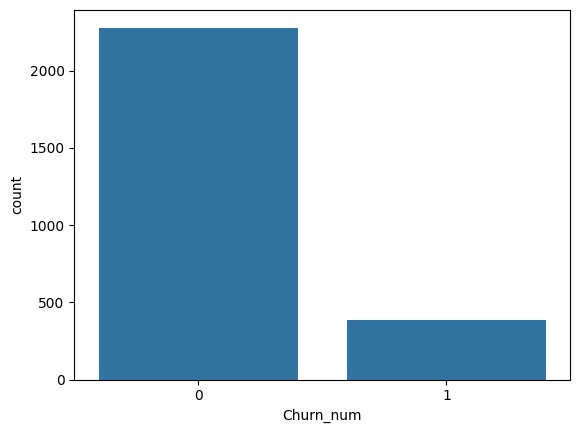

In [16]:
sns.countplot(x="Churn_num", data = telecom_churn)
#sns.barplot(x = 'Churn')

**MOST CUSTOMERS DON'T SEEM TO LEAVE THE SERVICE PROVIDER**

In [17]:
print(telecom_churn['Intl_plan_num'].value_counts())

Intl_plan_num
0    2396
1     270
Name: count, dtype: int64


Intl_plan_num
0    2396
1     270
Name: count, dtype: int64


<Axes: xlabel='Intl_plan_num', ylabel='count'>

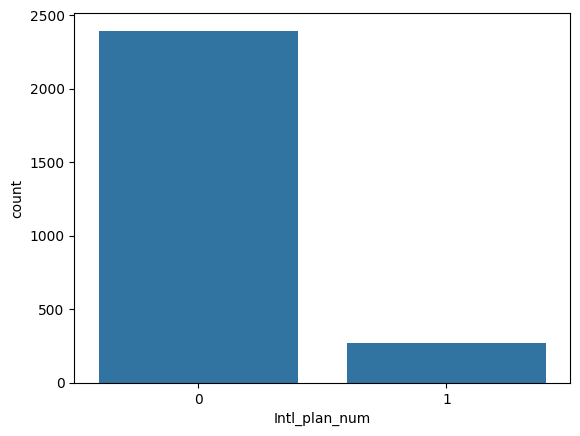

In [18]:
print(telecom_churn['Intl_plan_num'].value_counts())
sns.countplot(x="Intl_plan_num", order= telecom_churn['Intl_plan_num'].value_counts(ascending = False).index, data = telecom_churn)

Vmail_plan_num
0    1933
1     733
Name: count, dtype: int64


<Axes: xlabel='Vmail_plan_num', ylabel='count'>

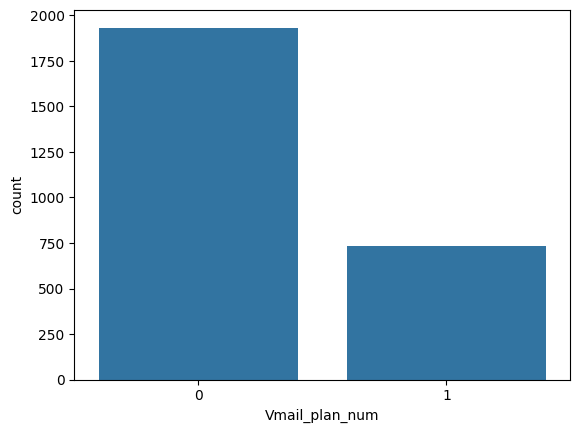

In [19]:
print(telecom_churn['Vmail_plan_num'].value_counts())
sns.countplot(x="Vmail_plan_num", data = telecom_churn)

Customer service calls
1    945
2    608
0    555
3    348
4    133
5     49
6     17
7      8
9      2
8      1
Name: count, dtype: int64


<Axes: xlabel='Customer service calls', ylabel='count'>

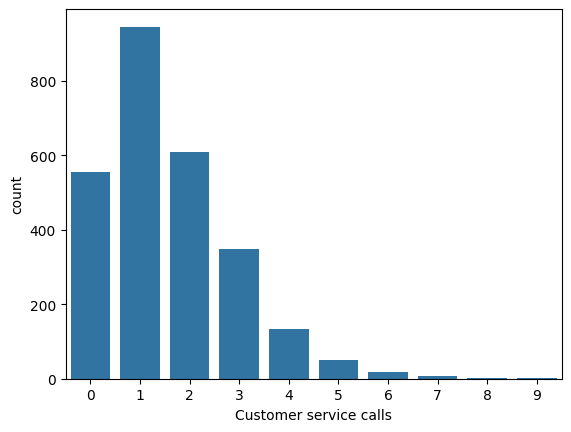

In [20]:
print(telecom_churn['Customer service calls'].value_counts())
sns.countplot(x="Customer service calls", data = telecom_churn)

<Axes: xlabel='Churn_num', ylabel='Customer service calls'>

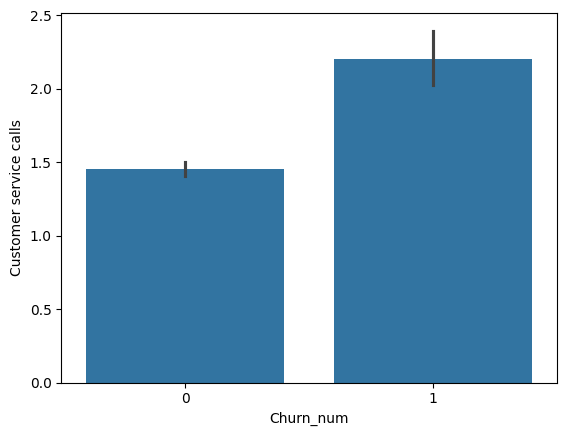

In [21]:
sns.barplot(x = 'Churn_num', y = 'Customer service calls', data = telecom_churn)

* y-axis is average value.


**ChURNED CUSTOMERS HAVE MADE MORE CALLS TO CUSTOMER SERVICE CENTERS**

<Axes: xlabel='Churn_num', ylabel='Intl_plan_num'>

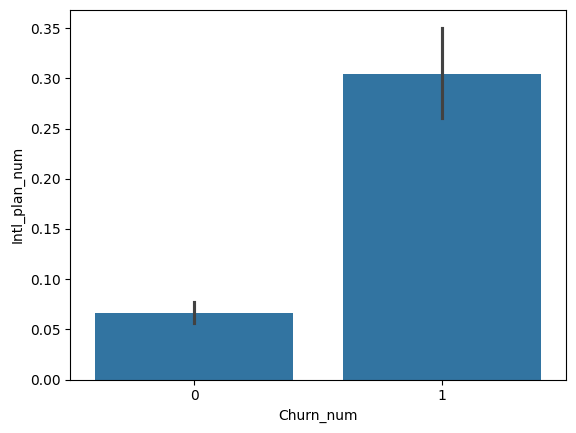

In [22]:
sns.barplot(x = 'Churn_num', y = 'Intl_plan_num', data = telecom_churn)

<Axes: xlabel='Churn_num', ylabel='Vmail_plan_num'>

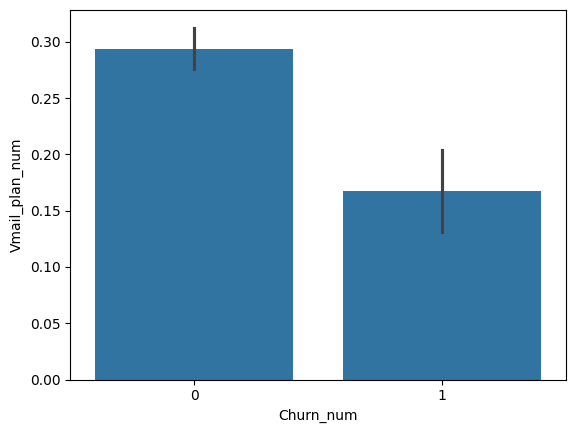

In [23]:
sns.barplot(x = 'Churn_num', y = 'Vmail_plan_num', data = telecom_churn)

<Axes: xlabel='Churn_num', ylabel='Account length'>

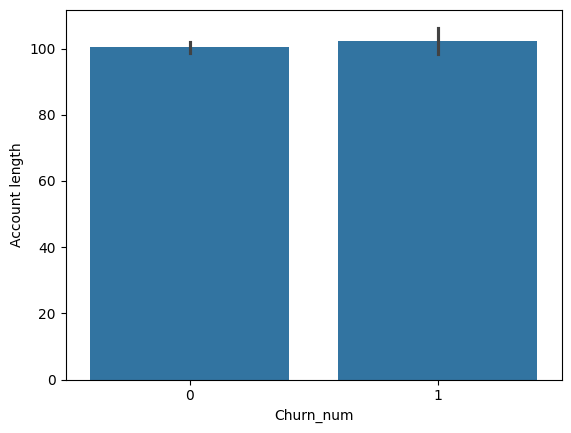

In [24]:
sns.barplot(x = 'Churn_num', y = 'Account length', data = telecom_churn)

## **DATA DISTRIBUTION - HISTOGRAMS**

array([[<Axes: title={'center': 'Account length'}>,
        <Axes: title={'center': 'Area code'}>,
        <Axes: title={'center': 'Number vmail messages'}>,
        <Axes: title={'center': 'Total day minutes'}>],
       [<Axes: title={'center': 'Total day calls'}>,
        <Axes: title={'center': 'Total day charge'}>,
        <Axes: title={'center': 'Total eve minutes'}>,
        <Axes: title={'center': 'Total eve calls'}>],
       [<Axes: title={'center': 'Total eve charge'}>,
        <Axes: title={'center': 'Total night minutes'}>,
        <Axes: title={'center': 'Total night calls'}>,
        <Axes: title={'center': 'Total night charge'}>],
       [<Axes: title={'center': 'Total intl minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>,
        <Axes: title={'center': 'Total intl charge'}>,
        <Axes: title={'center': 'Customer service calls'}>],
       [<Axes: title={'center': 'Churn_num'}>,
        <Axes: title={'center': 'Intl_plan_num'}>,
        <Axes: title={'

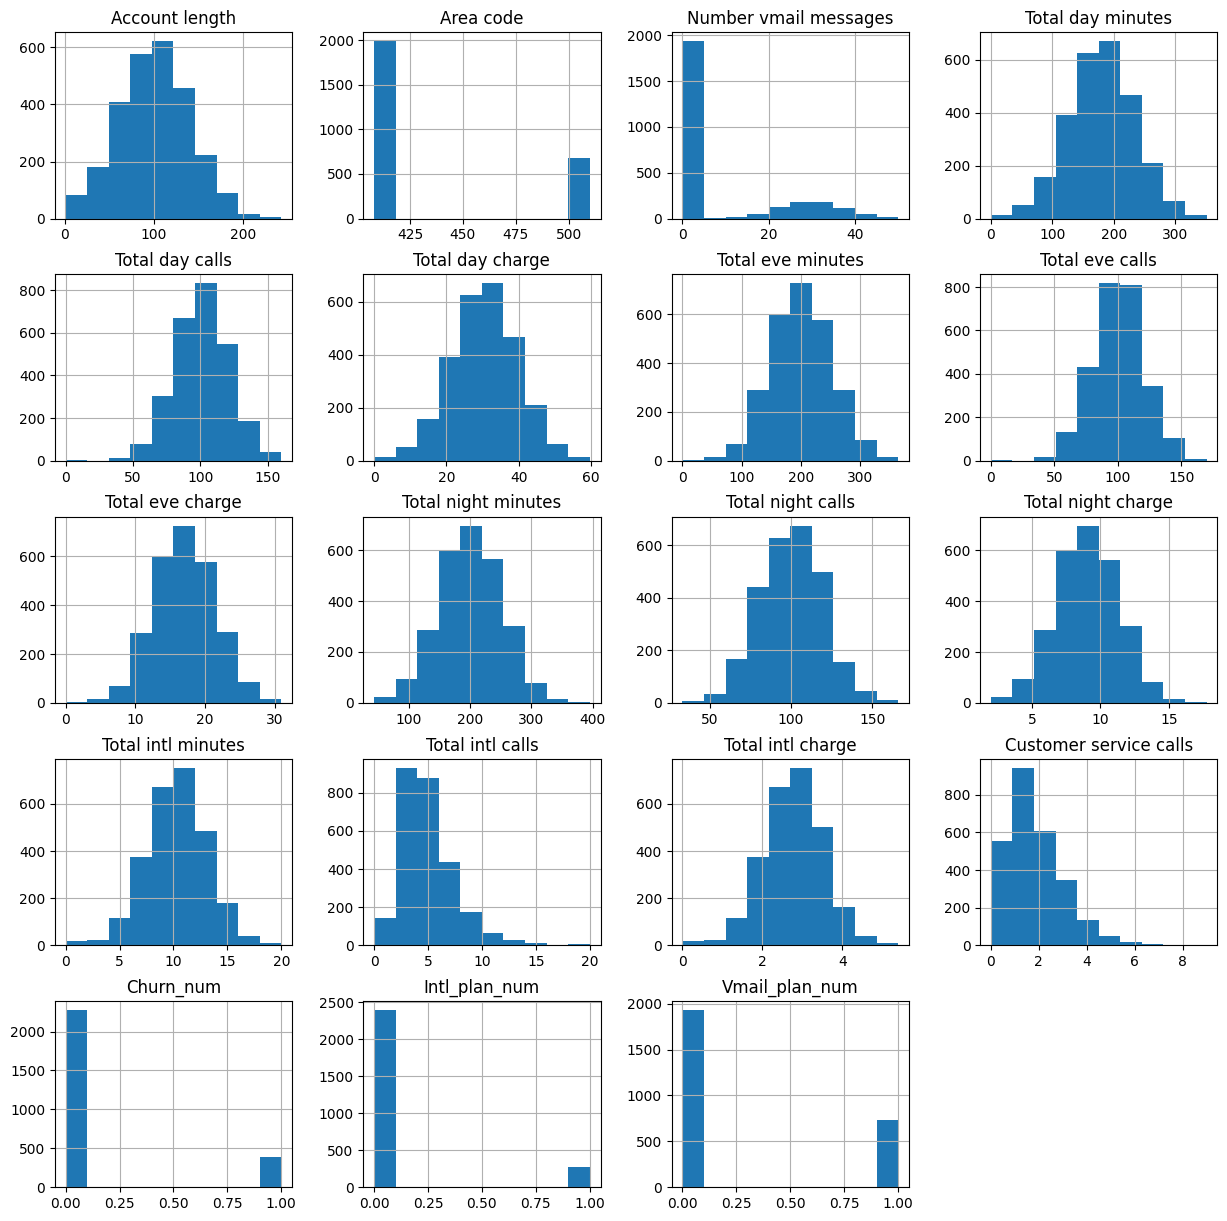

In [25]:
telecom_churn.hist(figsize = (15,15))

## **EXPLORING VARIABLE - ACCOUNT LENGTH**


{'whiskers': [<matplotlib.lines.Line2D at 0x79cc18da6910>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc18da7c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc18da6110>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc18db0f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc18db1810>],
 'means': []}

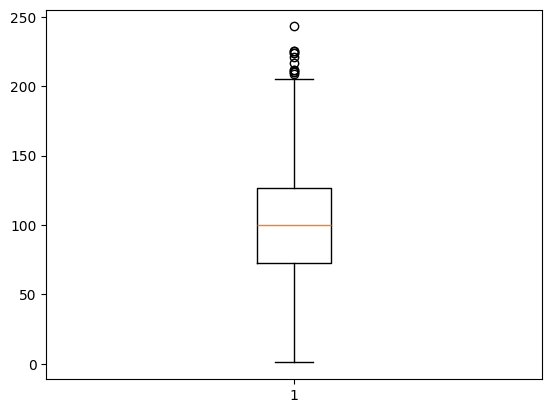

In [26]:
plt.boxplot(telecom_churn["Account length"])

In [27]:
account_percentile=telecom_churn['Account length'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(account_percentile,2)

,Account length
0.050,36.0
0.100,50.0
0.250,73.0
0.500,100.0
0.750,127.0
0.800,134.0
0.900,151.0
0.910,154.0
0.950,166.0
0.960,171.4


In [28]:
telecom_churn['Account length'].describe()

,Account length
count,2666.000000
mean,100.620405
std,39.563974
min,1.000000
25%,73.000000
50%,100.000000
75%,127.000000
max,243.000000


**The data spread is uniform. Replacing the 100percentile with the median**

In [29]:
median_Acc_length=telecom_churn['Account length'].median()
telecom_churn['Account_length_new']=telecom_churn['Account length']
telecom_churn['Account_length_new'][telecom_churn['Account_length_new']>194] = median_Acc_length

<ipython-input-29-37e3282e21c2>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  telecom_churn['Account_length_new'][telecom_churn['Account_length_new']>194] = median_Acc_length
<ipython-input-29-37e3282e21c2>:3: SettingWithCopyWarning: 
A v

In [30]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [31]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## **EXPLORING VARIABLE - AREA CODES**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc1766e450>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc1766f910>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc1766db10>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc17680b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc17681490>],
 'means': []}

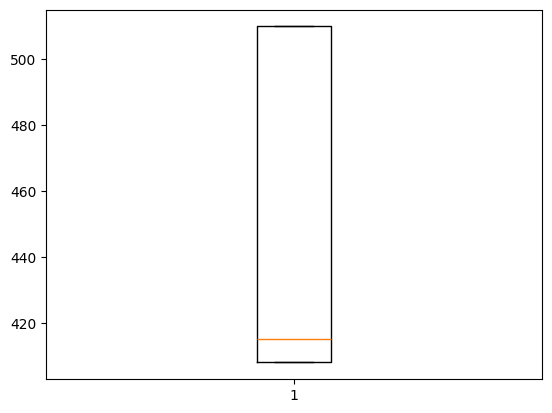

In [32]:
plt.boxplot(telecom_churn["Area code"])

(array([1987.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         679.]),
 array([408. , 418.2, 428.4, 438.6, 448.8, 459. , 469.2, 479.4, 489.6,
        499.8, 510. ]),
 <BarContainer object of 10 artists>)

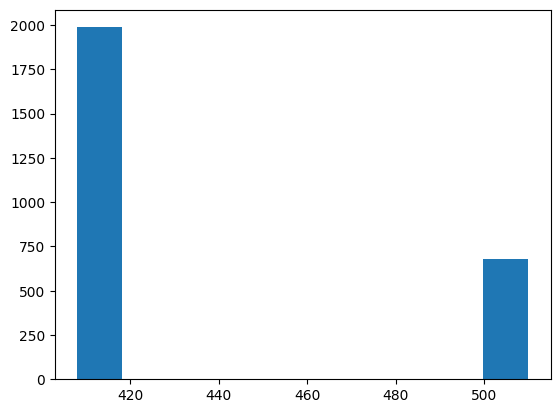

In [33]:
plt.hist(telecom_churn["Area code"])

In [34]:
telecom_churn['Area code'].unique()

array([415, 408, 510])

## **EXPLORING VARIABLE - NUMBER VMAIL MESSAGES**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc17551190>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc175525d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc17550890>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc175539d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc175582d0>],
 'means': []}

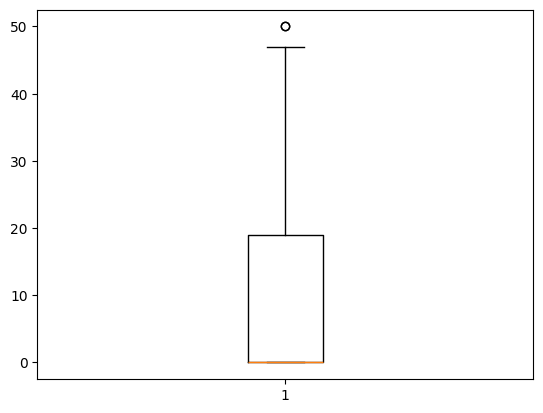

In [35]:
plt.boxplot(telecom_churn["Number vmail messages"])

In [36]:
vmail_percentile=telecom_churn['Number vmail messages'].quantile([0.05, 0.1, 0.25, 0.5, 0.6,0.65,0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(vmail_percentile,2)

,Number vmail messages
0.050,0.0
0.100,0.0
0.250,0.0
0.500,0.0
0.600,0.0
0.650,0.0
0.750,19.0
0.800,25.0
0.900,32.0
0.910,32.0


In [37]:
telecom_churn['Number vmail messages'].mean()

np.float64(8.021755438859715)

In [38]:
telecom_churn['Number vmail messages'].median()

0.0

In [39]:
mean_vmail=telecom_churn['Number vmail messages'].mean()
telecom_churn['number_vmail_new']=telecom_churn['Number vmail messages']
telecom_churn['number_vmail_new'][telecom_churn['number_vmail_new'] < 19 ] = mean_vmail

<ipython-input-39-7982f58ef490>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  telecom_churn['number_vmail_new'][telecom_churn['number_vmail_new'] < 19 ] = mean_vmail
<ipython-input-39-7982f58ef490>:3: SettingWithCopyWarning: 
A value is t

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc175affd0>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc175bd490>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc175af7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc175be810>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc175bf190>],
 'means': []}

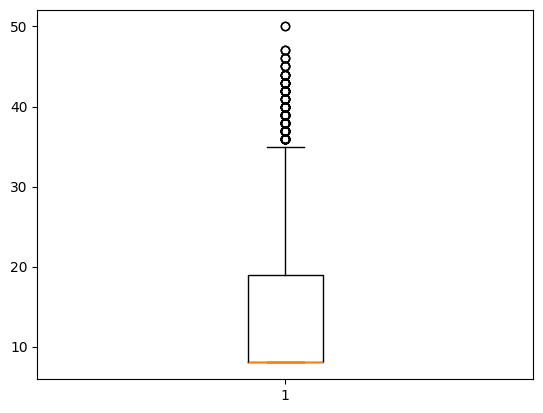

In [40]:
plt.boxplot(telecom_churn["number_vmail_new"])

In [41]:
telecom_churn.drop(['number_vmail_new'], axis =1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Churn_num,Intl_plan_num,Vmail_plan_num,Account_length_new
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,11.01,10.0,3,2.70,1,False,0,0,1,128
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,11.45,13.7,3,3.70,1,False,0,0,1,107
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,7.32,12.2,5,3.29,0,False,0,0,0,137
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,8.86,6.6,7,1.78,2,False,0,1,0,84
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,8.41,10.1,3,2.73,3,False,0,1,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,9.96,11.8,5,3.19,2,False,0,0,0,79
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,12.56,9.9,6,2.67,2,False,0,0,1,192
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,8.61,9.6,4,2.59,3,False,0,0,0,68
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,8.64,14.1,6,3.81,2,False,0,0,0,28


In [42]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## **EXPLORING VARIABLE - TOTAL DAY MINUTES**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc174153d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc17416710>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc17414b50>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc17417a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc17424410>],
 'means': []}

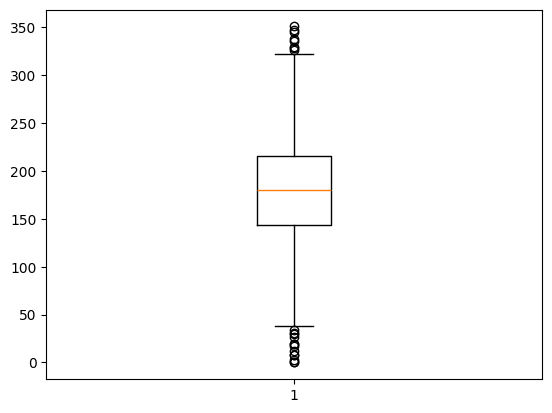

In [43]:
plt.boxplot(telecom_churn["Total day minutes"])

In [44]:
day_minutes_percentile=telecom_churn['Total day minutes'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(day_minutes_percentile,2)

,Total day minutes
0.000,0.00
0.010,50.92
0.100,110.40
0.200,134.30
0.300,150.60
0.400,165.80
0.500,179.95
0.600,194.30
0.700,207.70
0.800,223.50


In [45]:
telecom_churn['Total day minutes'].mean()

np.float64(179.48162040510127)

In [46]:
telecom_churn['Total day minutes'].median()

179.95

Box plot is clearly visible, hence not treating outliers

## **EXPLORING VARIABLE - TOTAL DAY CALLS**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc1747a290>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc1747b6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc17479ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc1748c890>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc1748d210>],
 'means': []}

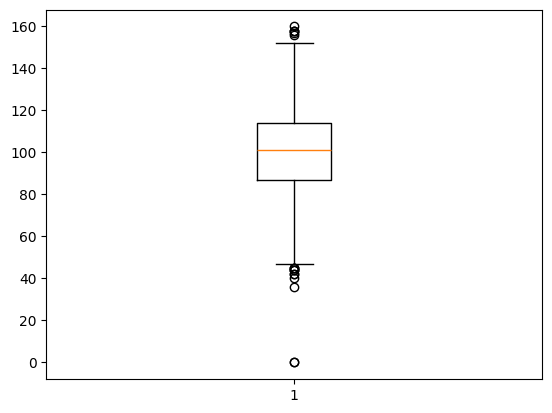

In [47]:
plt.boxplot(telecom_churn["Total day calls"])

In [48]:
day_calls_percentile=telecom_churn['Total day calls'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(day_calls_percentile,2)

,Total day calls
0.000,0.00
0.010,54.00
0.100,74.50
0.200,84.00
0.300,90.00
0.400,96.00
0.500,101.00
0.600,106.00
0.700,111.00
0.800,117.00


In [49]:
telecom_churn['Total day calls'].mean()

np.float64(100.31020255063765)

In [50]:
telecom_churn['Total day calls'].median()

101.0

**box plot is clearly visible, hence not treating outliers**

## **EXPLORING VARIABLE - TOTAL DAY CHARGE**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc174dfd50>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc174e9110>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc174df450>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc174ea390>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc174eac10>],
 'means': []}

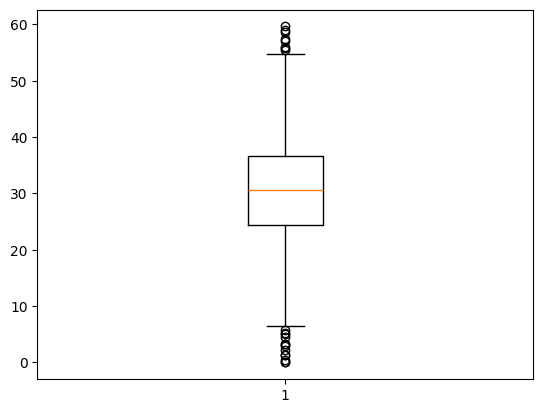

In [51]:
plt.boxplot(telecom_churn["Total day charge"])

In [52]:
day_charge_percentile=telecom_churn['Total day charge'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(day_charge_percentile,2)

,Total day charge
0.000,0.00
0.010,8.66
0.100,18.77
0.200,22.83
0.300,25.60
0.400,28.19
0.500,30.59
0.600,33.03
0.700,35.31
0.800,38.00


In [53]:
telecom_churn['Total day charge'].mean()

np.float64(30.512404351087774)

In [54]:
telecom_churn['Total day charge'].median()

30.59

**Box plot is clear; not treating for outliers**

## **EXPLORING VARIABLE = TOTAL EVE MINUTES**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc17357c10>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc17361050>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc17357290>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc173622d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc17362a90>],
 'means': []}

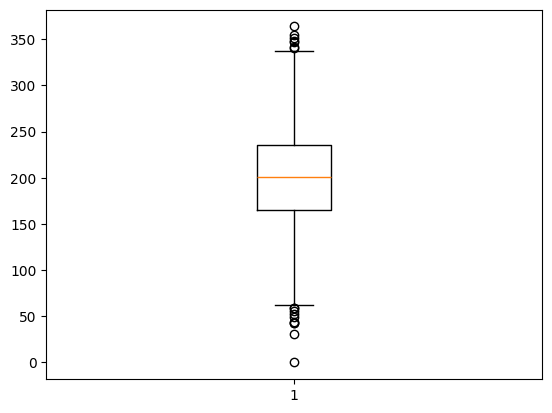

In [55]:
plt.boxplot(telecom_churn["Total eve minutes"])

In [56]:
eve_minutes_percentile=telecom_churn['Total eve minutes'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(eve_minutes_percentile,2)

,Total eve minutes
0.000,0.00
0.010,80.39
0.100,135.95
0.200,157.00
0.300,171.60
0.400,187.10
0.500,200.90
0.600,213.10
0.700,226.70
0.800,244.00


In [57]:
telecom_churn['Total eve minutes'].mean()

np.float64(200.38615903975995)

In [58]:
telecom_churn['Total eve minutes'].median()

200.9

**not treating any outliers**

## **EXPLORING VARIABLE - TOTAL EVE CALLS**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc173bebd0>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc173bff10>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc1749bad0>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc173c9350>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc173c9d10>],
 'means': []}

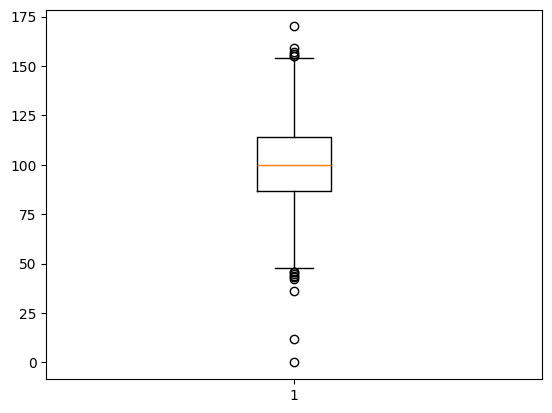

In [59]:
plt.boxplot(telecom_churn["Total eve calls"])

In [60]:
eve_calls_percentile=telecom_churn['Total eve calls'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(eve_calls_percentile,2)

,Total eve calls
0.000,0.00
0.010,53.00
0.100,74.00
0.200,83.00
0.300,89.00
0.400,95.00
0.500,100.00
0.600,105.00
0.700,111.00
0.800,117.00


In [61]:
telecom_churn['Total eve calls'].mean()

np.float64(100.02363090772693)

In [62]:
telecom_churn['Total eve calls'].median()

100.0

In [63]:
median_eve_calls=telecom_churn['Total eve calls'].median()
telecom_churn['Total_eve_calls_new']=telecom_churn['Total eve calls']
telecom_churn['Total_eve_calls_new'][telecom_churn['Total_eve_calls_new'] > 156.34] = median_eve_calls

<ipython-input-63-af0aaf78ac8b>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  telecom_churn['Total_eve_calls_new'][telecom_churn['Total_eve_calls_new'] > 156.34] = median_eve_calls
<ipython-input-63-af0aaf78ac8b>:3: SettingWithCopyWarning

In [64]:
telecom_churn['Total_eve_calls_new'].describe()

,Total_eve_calls_new
count,2666.000000
mean,99.953863
std,20.052888
min,0.000000
25%,87.000000
50%,100.000000
75%,114.000000
max,156.000000


## **EXPLORE VARIABLE - TOTAL EVE CHARGE**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc1722e290>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc1722f690>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc1722d950>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc1723c890>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc1723d1d0>],
 'means': []}

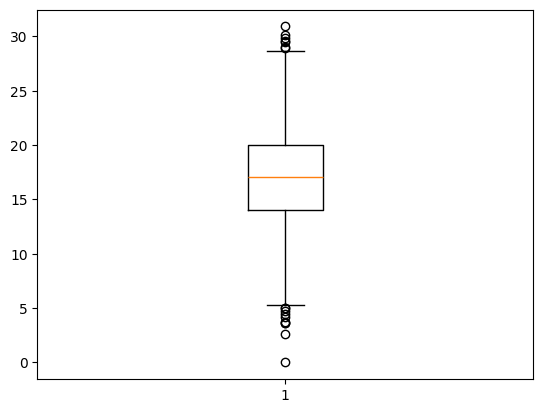

In [65]:
plt.boxplot(telecom_churn["Total eve charge"])

In [66]:
eve_charge_percentile=telecom_churn['Total eve charge'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(eve_charge_percentile,2)

,Total eve charge
0.000,0.00
0.010,6.83
0.100,11.56
0.200,13.35
0.300,14.58
0.400,15.90
0.500,17.08
0.600,18.11
0.700,19.27
0.800,20.74


In [67]:
telecom_churn['Total eve charge'].mean()

np.float64(17.0330720180045)

In [68]:
telecom_churn['Total eve charge'].median()

17.08

**data is evenly spread out and box plot is also clear, not treating for outliers**

## **EXPLORE VARIABLE - TOTAL NIGHT MINUTES**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc172934d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc172a4750>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc17292bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc172a5bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc172a6550>],
 'means': []}

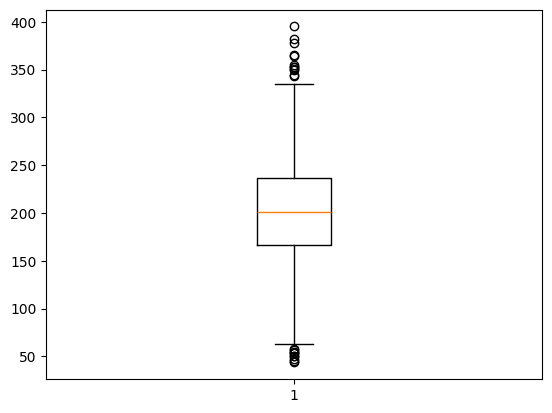

In [69]:
plt.boxplot(telecom_churn["Total night minutes"])

In [70]:
night_min_percentile=telecom_churn['Total night minutes'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(night_min_percentile,2)

,Total night minutes
0.000,43.70
0.010,80.10
0.100,136.55
0.200,158.70
0.300,174.00
0.400,188.20
0.500,201.15
0.600,214.20
0.700,227.80
0.800,244.30


In [71]:
telecom_churn['Total night minutes'].mean()

np.float64(201.16894223555886)

In [72]:
telecom_churn['Total night minutes'].median()

201.14999999999998

**not treating for outliers, data is evenly spreadout. box plot is clear**

## **EXPLORING VARIABLE - TOTAL NIGHT CALLS**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc170ff0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc171144d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc170fe810>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc17115990>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc17116350>],
 'means': []}

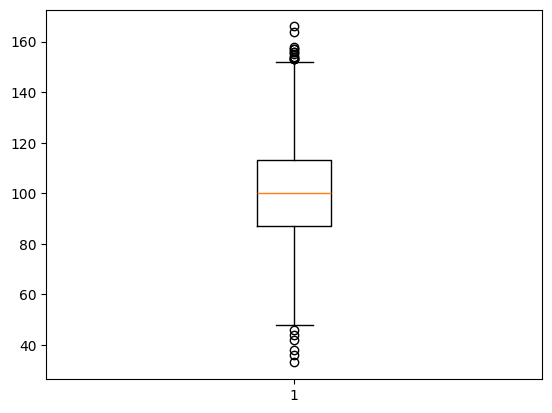

In [73]:
plt.boxplot(telecom_churn["Total night calls"])

In [74]:
night_calls_percentile=telecom_churn['Total night calls'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(night_calls_percentile,2)

,Total night calls
0.000,33.00
0.010,57.00
0.100,75.00
0.200,83.00
0.300,90.00
0.400,95.00
0.500,100.00
0.600,105.00
0.700,110.00
0.800,117.00


In [75]:
telecom_churn['Total night calls'].mean()

np.float64(100.10615153788447)

In [76]:
telecom_churn['Total night calls'].median()

100.0

**data is evenly spead out, box plot is clear, not treating outliers**

## **EXPLORING VARIABLE - TOTAL NIGHT CHARGE**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc171736d0>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc17180990>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc17172d50>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc17181c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc17182590>],
 'means': []}

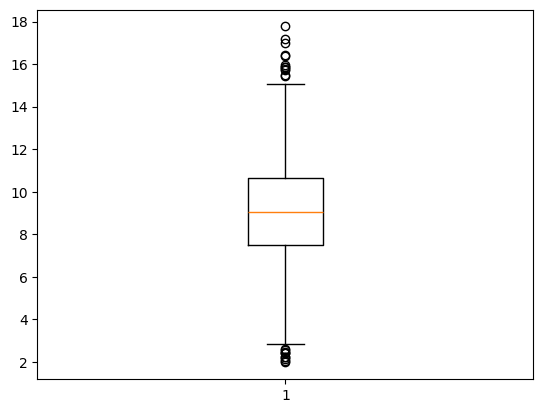

In [77]:
plt.boxplot(telecom_churn["Total night charge"])

In [78]:
night_charge_percentile=telecom_churn['Total night charge'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(night_charge_percentile,2)

,Total night charge
0.000,1.97
0.010,3.61
0.100,6.14
0.200,7.14
0.300,7.83
0.400,8.47
0.500,9.05
0.600,9.64
0.700,10.25
0.800,10.99


In [79]:
telecom_churn['Total night charge'].mean()

np.float64(9.05268942235559)

In [80]:
telecom_churn['Total night charge'].median()

9.05

**data is spread out evenly, box plot is clear, not treating for outlier**

## **EXPLORING VARIABLE - TOTAL INTL MINUTES**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc171e1110>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc171e2690>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc171e0850>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc171e3e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc1718ea10>],
 'means': []}

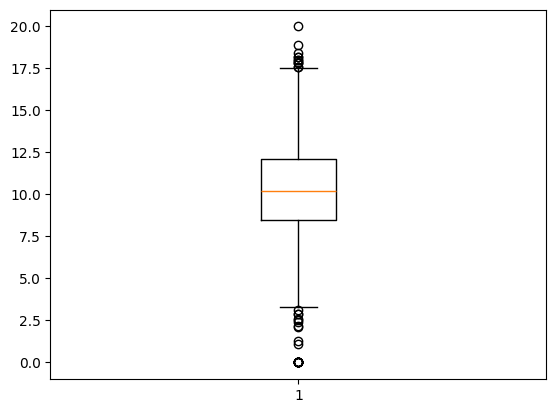

In [81]:
plt.boxplot(telecom_churn["Total intl minutes"])

In [82]:
intl_min_percentile=telecom_churn['Total intl minutes'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(intl_min_percentile,2)

,Total intl minutes
0.000,0.00
0.010,3.36
0.100,6.70
0.200,8.00
0.300,8.90
0.400,9.60
0.500,10.20
0.600,11.00
0.700,11.70
0.800,12.60


In [83]:
telecom_churn['Total intl minutes'].mean()

np.float64(10.23702175543886)

In [84]:
telecom_churn['Total intl minutes'].median()

10.2

## **EXPLORING VARIABLE - TOTAL INTL CALLS**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc1708a410>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc1708bb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc17089890>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc17091250>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc17091b10>],
 'means': []}

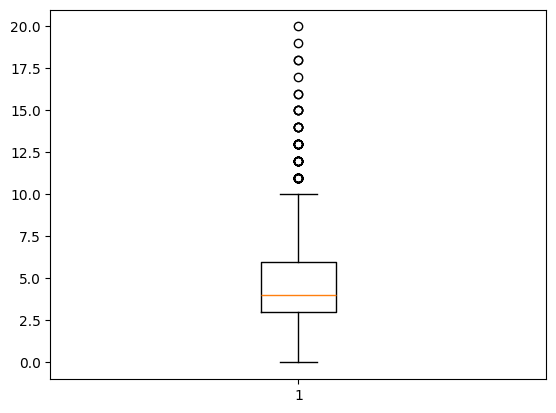

In [85]:
plt.boxplot(telecom_churn["Total intl calls"])

In [86]:
intl_calls_percentile=telecom_churn['Total intl calls'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(intl_calls_percentile,2)

,Total intl calls
0.000,0.00
0.010,1.00
0.100,2.00
0.200,3.00
0.300,3.00
0.400,3.00
0.500,4.00
0.600,5.00
0.700,5.00
0.800,6.00


In [87]:
telecom_churn['Total intl calls'].mean()

np.float64(4.467366841710428)

In [88]:
telecom_churn['Total intl calls'].median()

4.0

In [89]:
#median_intl_calls=telecom_churn['Total intl calls'].median()
#telecom_churn['Total_intl_calls_new']=telecom_churn['Total intl calls']
#telecom_churn['Total_intl_calls_new'][telecom_churn['Total_intl_calls_new']> 13] = median_intl_calls

In [90]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## **EXPLORING VARIBALES - CUSTOMER SERVICE CALLS**

{'whiskers': [<matplotlib.lines.Line2D at 0x79cc170eb750>,
 'caps': [<matplotlib.lines.Line2D at 0x79cc170f1010>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cc170eab90>],
 'medians': [<matplotlib.lines.Line2D at 0x79cc170db090>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cc170f2fd0>],
 'means': []}

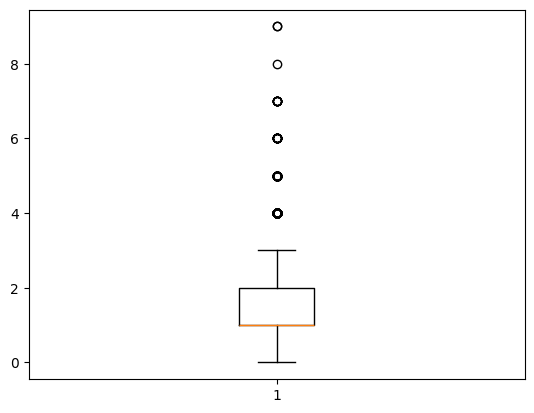

In [91]:
plt.boxplot(telecom_churn["Customer service calls"])

In [92]:
cust_calls_percentile=telecom_churn['Customer service calls'].quantile([0,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])
round(cust_calls_percentile,2)

,Customer service calls
0.000,0.00
0.010,0.00
0.100,0.00
0.200,0.00
0.300,1.00
0.400,1.00
0.500,1.00
0.600,2.00
0.700,2.00
0.800,3.00


In [93]:
telecom_churn['Customer service calls'].mean()

np.float64(1.5626406601650413)

In [94]:
telecom_churn['Customer service calls'].median()

1.0

In [95]:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [96]:
telecom_churn_new = telecom_churn.drop(columns = ['Churn','number_vmail_new','Total eve calls','Account length','International plan','Voice mail plan'], axis = 1)

# **LOGISTIC REGRESSION**

In [97]:
telecom_churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Area code               2666 non-null   int64  
 2   Number vmail messages   2666 non-null   int64  
 3   Total day minutes       2666 non-null   float64
 4   Total day calls         2666 non-null   int64  
 5   Total day charge        2666 non-null   float64
 6   Total eve minutes       2666 non-null   float64
 7   Total eve charge        2666 non-null   float64
 8   Total night minutes     2666 non-null   float64
 9   Total night calls       2666 non-null   int64  
 10  Total night charge      2666 non-null   float64
 11  Total intl minutes      2666 non-null   float64
 12  Total intl calls        2666 non-null   int64  
 13  Total intl charge       2666 non-null   float64
 14  Customer service calls  2666 non-null   

**TARGET VARIBALE Y = Churn_num**


In [98]:
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression()
logistic1.fit(telecom_churn_new[['Area code']+['Number vmail messages'] + ['Total day minutes'] + ['Total day calls'] + ['Total day charge']+['Total eve minutes'] + ['Total eve charge'] + ['Total night minutes'] + ['Total night calls'] + ['Total night charge']+['Total intl charge'] + ['Total intl calls'] + ['Total intl minutes'] + ['Customer service calls']+ ['Intl_plan_num'] + ['Vmail_plan_num'] +['Account_length_new'] + ['Total_eve_calls_new']],telecom_churn_new[['Churn_num']])
#logistic1.fit(telecom_churn_new[['Intl_plan_num']+['Vmail_plan_num']+ ['Account_length_new'] +['Total_eve_calls_new'] + ['Customer service calls']+ ['Total intl charge'] + ['Total intl calls'] + ['Total intl minutes'] + ['Total night charge'] + ['Total night calls'] + ['Total eve minutes'] +['Total day charge'] + ['Total day calls'] +['Total day minutes']],telecom_churn_new[['Churn_num']])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
print("Intercept", logistic1.intercept_)
print("Coefficient", logistic1.coef_)

Intercept [-0.01410055]
Coefficient [[-7.96575988e-03 -2.44950693e-02  9.70818619e-03 -2.68817939e-03
   1.66562352e-03  3.29860798e-03  2.30203185e-04  3.36299441e-04
  -1.37330680e-03  1.01978809e-05  1.35542597e-02 -1.63244789e-01
   5.02505290e-02  3.44624610e-01  1.37255261e-01 -1.14975147e-02
  -2.75687004e-04 -7.88252531e-03]]


## **CONFUSION MATRIX & ACCURACY**

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [101]:
predict1 = logistic1.predict(telecom_churn_new[['Area code']+['Number vmail messages'] + ['Total day minutes'] + ['Total day calls'] + ['Total day charge']+['Total eve minutes'] + ['Total eve charge'] + ['Total night minutes'] + ['Total night calls'] + ['Total night charge']+['Total intl charge'] + ['Total intl calls'] + ['Total intl minutes'] + ['Customer service calls']+ ['Intl_plan_num'] + ['Vmail_plan_num'] +['Account_length_new'] + ['Total_eve_calls_new']])
predict1
cm1 = confusion_matrix(telecom_churn_new[['Churn_num']],predict1)
print(cm1)

[[2259   19]
 [ 360   28]]


In [102]:
print("col sums", sum(cm1))
total1 = sum(sum(cm1))
print("Total", total1)

col sums [2619   47]
Total 2666


In [103]:
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
accuracy1

np.float64(0.8578394598649662)

## **MULTICOLLINEARITY**

In [104]:
#import statsmodels.formula.api as sm

#def vif_cal(input_data, dependent_col):
 #   x_vars=input_data.drop([dependent_col], axis=1)
  #  xvar_names=x_vars.columns
   # for i in range(0,xvar_names.shape[0]):
    #    y=x_vars[xvar_names[i]]
     #   x=x_vars[xvar_names.drop(xvar_names[i])]
      #  rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
       # vif=round(1/(1-rsq),2)
        #print (xvar_names[i], " VIF = " , vif)

In [105]:
import statsmodels.formula.api as sm1
def vif_cals(x_vars):
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm1.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [106]:
vif_cals(x_vars=telecom_churn_new.drop(["State", "Churn_num"], axis=1))

Area code  VIF =  1.01
Number vmail messages  VIF =  12.0
Total day minutes  VIF =  10414870.23
Total day calls  VIF =  1.0
Total day charge  VIF =  10414880.43
Total eve minutes  VIF =  2295975.83
Total eve charge  VIF =  2295978.05
Total night minutes  VIF =  648441.58
Total night calls  VIF =  1.0
Total night charge  VIF =  648441.19
Total intl minutes  VIF =  68415.01
Total intl calls  VIF =  1.01
Total intl charge  VIF =  68414.6
Customer service calls  VIF =  1.01
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  12.0
Account_length_new  VIF =  1.01
Total_eve_calls_new  VIF =  1.0


**Dropping variable one at a time that have the highest VIF or VIF > 5. An important point here is to have Industy knowledge on variables and which ones may be highly correlated, i.e., do not drop variables radomly**

In [107]:
vif_cals(x_vars=telecom_churn_new.drop(["State", "Churn_num", "Total day minutes"], axis=1))

Area code  VIF =  1.01
Number vmail messages  VIF =  12.0
Total day calls  VIF =  1.0
Total day charge  VIF =  1.01
Total eve minutes  VIF =  2295569.62
Total eve charge  VIF =  2295570.64
Total night minutes  VIF =  647991.81
Total night calls  VIF =  1.0
Total night charge  VIF =  647992.0
Total intl minutes  VIF =  68392.1
Total intl calls  VIF =  1.01
Total intl charge  VIF =  68391.57
Customer service calls  VIF =  1.01
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  12.0
Account_length_new  VIF =  1.01
Total_eve_calls_new  VIF =  1.0


In [108]:
vif_cals(x_vars=telecom_churn_new.drop(["State", "Churn_num", "Total day minutes","Total eve minutes"], axis=1))

Area code  VIF =  1.01
Number vmail messages  VIF =  12.0
Total day calls  VIF =  1.0
Total day charge  VIF =  1.01
Total eve charge  VIF =  1.0
Total night minutes  VIF =  647989.46
Total night calls  VIF =  1.0
Total night charge  VIF =  647989.71
Total intl minutes  VIF =  68385.49
Total intl calls  VIF =  1.01
Total intl charge  VIF =  68384.89
Customer service calls  VIF =  1.0
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  12.0
Account_length_new  VIF =  1.01
Total_eve_calls_new  VIF =  1.0


In [109]:
vif_cals(x_vars=telecom_churn_new.drop(["State", "Churn_num", "Total day minutes","Total eve minutes","Total night minutes"], axis=1))

Area code  VIF =  1.01
Number vmail messages  VIF =  11.99
Total day calls  VIF =  1.0
Total day charge  VIF =  1.01
Total eve charge  VIF =  1.0
Total night calls  VIF =  1.0
Total night charge  VIF =  1.0
Total intl minutes  VIF =  68384.94
Total intl calls  VIF =  1.01
Total intl charge  VIF =  68384.32
Customer service calls  VIF =  1.0
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  12.0
Account_length_new  VIF =  1.01
Total_eve_calls_new  VIF =  1.0


In [110]:
vif_cals(x_vars=telecom_churn_new.drop(["State", "Churn_num", "Total day minutes","Total eve minutes","Total night minutes","Total intl minutes"], axis=1))

Area code  VIF =  1.01
Number vmail messages  VIF =  11.99
Total day calls  VIF =  1.0
Total day charge  VIF =  1.01
Total eve charge  VIF =  1.0
Total night calls  VIF =  1.0
Total night charge  VIF =  1.0
Total intl calls  VIF =  1.01
Total intl charge  VIF =  1.01
Customer service calls  VIF =  1.0
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  11.99
Account_length_new  VIF =  1.01
Total_eve_calls_new  VIF =  1.0


In [111]:
vif_cals(x_vars=telecom_churn_new.drop(["State", "Churn_num", "Total day minutes","Total eve minutes","Total night minutes","Total intl minutes","Number vmail messages"], axis=1))

Area code  VIF =  1.01
Total day calls  VIF =  1.0
Total day charge  VIF =  1.0
Total eve charge  VIF =  1.0
Total night calls  VIF =  1.0
Total night charge  VIF =  1.0
Total intl calls  VIF =  1.0
Total intl charge  VIF =  1.01
Customer service calls  VIF =  1.0
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  1.0
Account_length_new  VIF =  1.0
Total_eve_calls_new  VIF =  1.0


## **INDIVIDUAL IMPACT OF VARIABLES**

In [112]:
import statsmodels.api as sm1
m1=sm1.Logit(telecom_churn_new['Churn_num'],telecom_churn_new[['Area code'] + ['Total day calls'] + ['Total day charge'] + ['Total eve charge'] + ['Total night calls']+['Total night charge'] + ['Total intl calls'] +['Total intl charge'] + ['Customer service calls']+['Intl_plan_num'] + ['Vmail_plan_num'] + ['Account_length_new'] + ['Total_eve_calls_new']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.335616
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.335616
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2653
Method:                           MLE   Df Model:                           12
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1911
Time:                        05:34:30   Log-Likelihood:                -894.75
converged:                       True   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                 5.935e-83
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

**Output above:**
1. Look at the Z-value: Thihs examples the null hypothesis - not impactful versus the alternative hypothesis, which is impactful.
2. Looking at the output, if the P>|Z| is  < 0.05, the variable is considered impactful. If the P>|Z| >= 0.05 it is not impactful
3. Looking at the summary output above, we can see Total day calls, total night charge, Account length new, and total night calls have P-value >0.05. We can safely drop these variables.

In [113]:
import statsmodels.api as sm1
m2=sm1.Logit(telecom_churn_new['Churn_num'],telecom_churn_new[['Area code'] + ['Total day charge'] + ['Total eve charge'] + ['Total intl calls'] +['Total intl charge'] + ['Customer service calls']+['Intl_plan_num'] + ['Vmail_plan_num'] + ['Total_eve_calls_new']])
m2.fit()
print(m2.fit().summary())

Optimization terminated successfully.
         Current function value: 0.336908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.336908
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2657
Method:                           MLE   Df Model:                            8
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1880
Time:                        05:34:30   Log-Likelihood:                -898.20
converged:                       True   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                 7.835e-85
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

## **CONFUSION MATRIX & ACCURACY**

## **SENSITIVITY AND SPECIFICITY**

In [114]:
import statsmodels.api as sm1
m2=sm1.Logit(telecom_churn_new['Churn_num'],telecom_churn_new[['Area code'] + ['Total day charge'] + ['Total eve charge'] + ['Total intl calls'] +['Total intl charge'] + ['Customer service calls']+['Intl_plan_num'] + ['Vmail_plan_num'] + ['Total_eve_calls_new']])
results = m2.fit()
print(results.summary())


#m2=sm1.Logit(telecom_churn['Churn_num'],telecom_churn[['Area code']+['Total day minutes']+['Total eve minutes'] + ['Total eve calls']+['Total intl charge']+['Customer service calls']+['Intl_plan_num']+['Vmail_plan_num']+['Total_intl_calls_new']])
#results = m2.fit()
#print(results.summary())

Optimization terminated successfully.
         Current function value: 0.336908
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2657
Method:                           MLE   Df Model:                            8
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1880
Time:                        05:34:30   Log-Likelihood:                -898.20
converged:                       True   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                 7.835e-85
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Area code                 -0.0096      0.001     -9.684      0.000      -0.012      

In [115]:
#CREATE THE CONFUSION MATRIX
#PREDICT THE VARIABLE
predictions = results.predict()
print(predictions[0:10])
len(predictions)

[0.11062442 0.04932051 0.08893517 0.69262616 0.63454329 0.19374768
 0.05181182 0.20185853 0.31928363 0.0363584 ]


2666

## **THRESHOLD**

In [116]:
#converting predicted values into classes using threshold
threshold = 0.7
predicted_class1=[0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [117]:
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(telecom_churn_new["Churn_num"], predicted_class1)
print('Confusion Matrix : \n', cm3)
total3 = sum(sum(cm3))
#From confusion matrix calcuate accuracy
accuracy1 = (cm3[0,0]+cm3[1,1])/total3
print('Accuracy', accuracy1)

sensitivity1 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[2268   10]
 [ 360   28]]
Accuracy 0.8612153038259565
Sensitivity :  0.9956101843722563
Specificity :  0.07216494845360824


In [118]:
#Threshold = 0.8
threshold = 0.8
predicted_class1=[0 if x < threshold else 1 for x in predictions]
#print(predicted_class1[0:10])
cm3 = confusion_matrix(telecom_churn_new["Churn_num"], predicted_class1)
print('Confusion Matrix : \n', cm3)
total3 = sum(sum(cm3))
#From confusion matrix calcuate accuracy
accuracy1 = (cm3[0,0]+cm3[1,1])/total3
print('Accuracy', accuracy1)

sensitivity1 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[2275    3]
 [ 380    8]]
Accuracy 0.8563390847711928
Sensitivity :  0.9986830553116769
Specificity :  0.020618556701030927


In [119]:
#Threshold = 0.2
threshold = 0.2
predicted_class1=[0 if x < threshold else 1 for x in predictions]
#print(predicted_class1[0:10])
cm3 = confusion_matrix(telecom_churn_new["Churn_num"], predicted_class1)
print('Confusion Matrix : \n', cm3)
total3 = sum(sum(cm3))
#From confusion matrix calcuate accuracy
accuracy1 = (cm3[0,0]+cm3[1,1])/total3
print('Accuracy', accuracy1)

sensitivity1 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1895  383]
 [ 149  239]]
Accuracy 0.800450112528132
Sensitivity :  0.8318700614574188
Specificity :  0.615979381443299


In [120]:
#Threshold = 0.3
threshold = 0.3
predicted_class1=[0 if x < threshold else 1 for x in predictions]
#print(predicted_class1[0:10])
cm3 = confusion_matrix(telecom_churn_new["Churn_num"], predicted_class1)
print('Confusion Matrix : \n', cm3)
total3 = sum(sum(cm3))
#From confusion matrix calcuate accuracy
accuracy1 = (cm3[0,0]+cm3[1,1])/total3
print('Accuracy', accuracy1)

sensitivity1 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[2083  195]
 [ 216  172]]
Accuracy 0.8458364591147787
Sensitivity :  0.9143985952589991
Specificity :  0.44329896907216493


**By changing the threshold from to 0.2, we have further improved the specificty from 2.06% to 61.59%. However, the sensitivity has reduced from 99.8%  to 83.18%. if we further reduce the threshold, specificty will increase at the cost of sensitivity. we will be wrongly classifying customer who will churn vs. not churn.**

## **ROC**

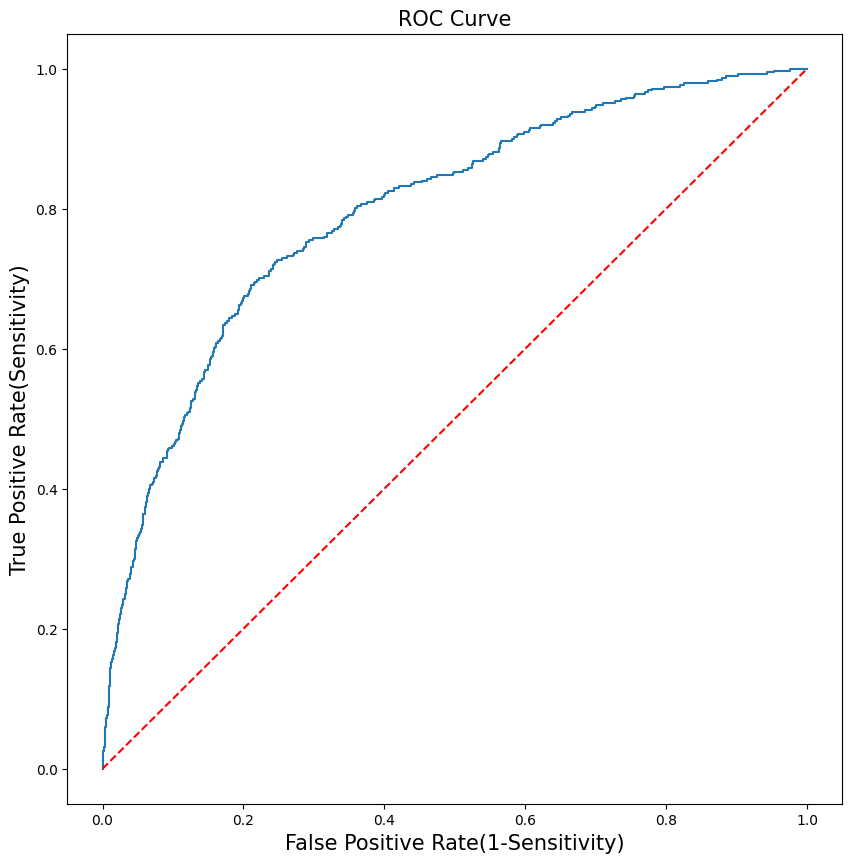

In [121]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = telecom_churn_new["Churn_num"]
False_positive_rate, True_positive_rate, thresholds = roc_curve(actual, predictions)
plt.figure(figsize=(10,10))
plt.title('ROC Curve', fontsize = 15)
plt.plot(False_positive_rate, True_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('True Positive Rate(Sensitivity)', fontsize = 15)
plt.xlabel('False Positive Rate(1-Sensitivity)', fontsize = 15)
plt.show()

## **AREA UNDER CURVE (AUC)**

In [122]:
roc_auc = auc(False_positive_rate, True_positive_rate)
roc_auc

np.float64(0.7966519736067992)



```
# This is formatted as code
```

**The AUC is close to 1, i.e., 0.8, the model is considered to be good.**

## **PRECISION, RECALL, and F1 SCORE**

In [123]:
#F1 Score
threshold = 0.5
predicted_class1=[0 if x < threshold else 1 for x in predictions]
#print(predicted_class1[0:10])
cm3 = confusion_matrix(telecom_churn_new["Churn_num"], predicted_class1)
print('Confusion Matrix : \n', cm3)
total3 = sum(sum(cm3))
#From confusion matrix calcuate accuracy
accuracy1 = (cm3[0,0]+cm3[1,1])/total3
print('Accuracy', accuracy1)

Precision_Class0 = cm3[0,0]/(cm3[0,0]+cm3[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )

Precision_Class1 = cm3[1,1]/(cm3[0,1]+cm3[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )

Confusion Matrix : 
 [[2220   58]
 [ 303   85]]
Accuracy 0.8645911477869468
Precision_Class0 :  0.8799048751486326
Recall_Class0 :  0.974539069359087
F1_Class0 :  0.9248073318058738
Precision_Class1 :  0.5944055944055944
Recall_Class1 :  0.2190721649484536
F1_Class1 :  0.32015065913371


In [124]:
#F1 Score
threshold = 0.2
predicted_class1=[0 if x < threshold else 1 for x in predictions]
#print(predicted_class1[0:10])
cm3 = confusion_matrix(telecom_churn_new["Churn_num"], predicted_class1)
print('Confusion Matrix : \n', cm3)
total3 = sum(sum(cm3))
#From confusion matrix calcuate accuracy
accuracy1 = (cm3[0,0]+cm3[1,1])/total3
print('Accuracy', accuracy1)

Precision_Class0 = cm3[0,0]/(cm3[0,0]+cm3[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )

Precision_Class1 = cm3[1,1]/(cm3[0,1]+cm3[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )

Confusion Matrix : 
 [[1895  383]
 [ 149  239]]
Accuracy 0.800450112528132
Precision_Class0 :  0.9271037181996086
Recall_Class0 :  0.8318700614574188
F1_Class0 :  0.8769088385006941
Precision_Class1 :  0.3842443729903537
Recall_Class1 :  0.615979381443299
F1_Class1 :  0.47326732673267324


**Alternatively, we can use classification report to generate precision, Recall, F1-Score, and data (support)**

In [125]:
from sklearn.metrics import classification_report
print(classification_report(telecom_churn_new["Churn_num"],predicted_class1))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2278
           1       0.38      0.62      0.47       388

    accuracy                           0.80      2666
   macro avg       0.66      0.72      0.68      2666
weighted avg       0.85      0.80      0.82      2666



**Precision** = Out of all the Customers that the model predicted would Churn, 38% actually did.

**Recall** = Out of all the Customers that actually Churned, the model only predicted this outcome correctly for 62% of those Customers.

**F1 Score** = Since this value isn’t very close to 1, it tells us that the model does a poor job of predicting whether or not Customers will Churn.

# **HANDLING UNBALANCED DATA**

In [126]:
telecom_churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Area code               2666 non-null   int64  
 2   Number vmail messages   2666 non-null   int64  
 3   Total day minutes       2666 non-null   float64
 4   Total day calls         2666 non-null   int64  
 5   Total day charge        2666 non-null   float64
 6   Total eve minutes       2666 non-null   float64
 7   Total eve charge        2666 non-null   float64
 8   Total night minutes     2666 non-null   float64
 9   Total night calls       2666 non-null   int64  
 10  Total night charge      2666 non-null   float64
 11  Total intl minutes      2666 non-null   float64
 12  Total intl calls        2666 non-null   int64  
 13  Total intl charge       2666 non-null   float64
 14  Customer service calls  2666 non-null   

In [127]:
print("Actual Data :", telecom_churn_new.shape)

#Frequency count on target column
freq=telecom_churn_new['Churn_num'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
telecom_churn_new_class0 = telecom_churn_new[telecom_churn['Churn_num'] == 0]
telecom_churn_new_class1 = telecom_churn_new[telecom_churn['Churn_num'] == 1]

print("Class0 Actual :", telecom_churn_new_class0.shape)
print("Class1 Actual  :", telecom_churn_new_class1.shape)


Actual Data : (2666, 20)
Churn_num
0    2278
1     388
Name: count, dtype: int64
Churn_num
0    85.446362
1    14.553638
Name: count, dtype: float64
Class0 Actual : (2278, 20)
Class1 Actual  : (388, 20)


**In the US market customer Churn rate in the telecom/wireless market is in the rage of 21% to 25%. Considering this we will boost the sample size of Class 1**

In [128]:
##Undersampling of class-0
## Consider half of class-0
telecom_churn_new_class0_under = telecom_churn_new_class0.sample(int(0.4*len(telecom_churn_new_class0)))
print("Class0 Undersample :", telecom_churn_new_class0_under.shape)

##Oversampling of Class-1
# Lets increase the size by two times
telecom_churn_new_class1_over = telecom_churn_new_class1.sample(2*len(telecom_churn_new_class1),replace=True)
print("Class1 Oversample :", telecom_churn_new_class1_over.shape)

#Concatenate to create the final balanced data
telecom_churn_new_balanced=pd.concat([telecom_churn_new_class0_under,telecom_churn_new_class1_over])
print("Final Balannced Data :", telecom_churn_new_balanced.shape)

#Frequency count on target column in the balanced data
freq=telecom_churn_new_balanced['Churn_num'].value_counts()
print(freq)
print((freq/freq.sum())*100)

Class0 Undersample : (911, 20)
Class1 Oversample : (776, 20)
Final Balannced Data : (1687, 20)
Churn_num
0    911
1    776
Name: count, dtype: int64
Churn_num
0    54.001186
1    45.998814
Name: count, dtype: float64


# **MODEL WITH BALANCED DATA**

In [129]:
import statsmodels.api as sm1
m3=sm1.Logit(telecom_churn_new_balanced['Churn_num'],telecom_churn_new_balanced[['Area code'] + ['Total day charge'] + ['Total eve charge'] + ['Total intl calls'] +['Total intl charge'] + ['Customer service calls']+['Intl_plan_num'] + ['Vmail_plan_num'] + ['Total_eve_calls_new']])
results = m3.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.524549
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                 1687
Model:                          Logit   Df Residuals:                     1678
Method:                           MLE   Df Model:                            8
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.2397
Time:                        05:34:31   Log-Likelihood:                -884.91
converged:                       True   LL-Null:                       -1163.9
Covariance Type:            nonrobust   LLR p-value:                2.441e-115
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Area code                 -0.0082      0.001     -8.953      0.000      -0.010      

**Droping variable total eve charge and Total Intl charge since its P>|Z| is greater than 0.05**

In [130]:
import statsmodels.api as sm1
m3=sm1.Logit(telecom_churn_new_balanced['Churn_num'],telecom_churn_new_balanced[['Area code'] + ['Total day charge'] + ['Total intl calls'] + ['Customer service calls']+['Intl_plan_num'] + ['Vmail_plan_num'] + ['Total_eve_calls_new']])
results = m3.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.530805
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                 1687
Model:                          Logit   Df Residuals:                     1680
Method:                           MLE   Df Model:                            6
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.2307
Time:                        05:34:31   Log-Likelihood:                -895.47
converged:                       True   LL-Null:                       -1163.9
Covariance Type:            nonrobust   LLR p-value:                9.276e-113
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Area code                 -0.0061      0.001     -8.058      0.000      -0.008      

## **UPDATED SENSITIVITY AND SPECIFICITY**

In [131]:
#CREATE THE CONFUSION MATRIX
#PREDICT THE VARIABLE
predictions = results.predict()
print(predictions[0:10])
len(predictions)

[0.07093111 0.17054109 0.26597838 0.11495869 0.49663257 0.46438853
 0.12113182 0.55467242 0.29107363 0.1677665 ]


1687

In [132]:
#converting predicted values into classes using threshold
threshold = 0.6
predicted_class1=[0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [133]:
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(telecom_churn_new_balanced["Churn_num"], predicted_class1)
print('Confusion Matrix : \n', cm3)
total3 = sum(sum(cm3))
#From confusion matrix calcuate accuracy
accuracy1 = (cm3[0,0]+cm3[1,1])/total3
print('Accuracy', accuracy1)

sensitivity1 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[794 117]
 [342 434]]
Accuracy 0.7279193835210432
Sensitivity :  0.8715697036223929
Specificity :  0.5592783505154639


By changing the threshold to 0.6, we have further improved the specificty to 54.3percent. However, the sensitivity to 86.05percent. if we further reduce the threshold, specificty will increase at the cost of sensitivity. we will be wrongly classifying customer who will churn vs. not churn.

## **UPDATED PRECISION, RECALL AND F1SCORE**

**We can use classification report to generate precision, Recall, F1-Score, and data (support)**

In [134]:
from sklearn.metrics import classification_report
print(classification_report(telecom_churn_new_balanced["Churn_num"],predicted_class1))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       911
           1       0.79      0.56      0.65       776

    accuracy                           0.73      1687
   macro avg       0.74      0.72      0.71      1687
weighted avg       0.74      0.73      0.72      1687



**Precision** = Out of all the Customers that the model predicted would Churn, 77% actually did.

**Recall** = Out of all the Customers that actually Churned, the model only predicted this outcome correctly for 54% of those Customers.

**F1 Score** = The value is close to 1, it tells us that the model does a good job of predicting whether or not Customers will Churn.

In [135]:
telecom_churn_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Area code               2666 non-null   int64  
 2   Number vmail messages   2666 non-null   int64  
 3   Total day minutes       2666 non-null   float64
 4   Total day calls         2666 non-null   int64  
 5   Total day charge        2666 non-null   float64
 6   Total eve minutes       2666 non-null   float64
 7   Total eve charge        2666 non-null   float64
 8   Total night minutes     2666 non-null   float64
 9   Total night calls       2666 non-null   int64  
 10  Total night charge      2666 non-null   float64
 11  Total intl minutes      2666 non-null   float64
 12  Total intl calls        2666 non-null   int64  
 13  Total intl charge       2666 non-null   float64
 14  Customer service calls  2666 non-null   

# **FEATURE ENGINEERING**

**Working with orginial data set**

In [136]:
telecom_churn.info() #to identify data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [137]:
#PRINT COLUMN NAMES
telecom_churn.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Churn_num', 'Intl_plan_num', 'Vmail_plan_num',
       'Account_length_new', 'number_vmail_new', 'Total_eve_calls_new'],
      dtype=object)

In [138]:
telecom_churn_fe=telecom_churn.drop(columns = ['Churn','State','International plan', 'Voice mail plan'], axis = 1)

In [139]:
telecom_churn_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   Number vmail messages   2666 non-null   int64  
 3   Total day minutes       2666 non-null   float64
 4   Total day calls         2666 non-null   int64  
 5   Total day charge        2666 non-null   float64
 6   Total eve minutes       2666 non-null   float64
 7   Total eve calls         2666 non-null   int64  
 8   Total eve charge        2666 non-null   float64
 9   Total night minutes     2666 non-null   float64
 10  Total night calls       2666 non-null   int64  
 11  Total night charge      2666 non-null   float64
 12  Total intl minutes      2666 non-null   float64
 13  Total intl calls        2666 non-null   int64  
 14  Total intl charge       2666 non-null   

In [140]:
telecom_churn_fe.columns.values

array(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn_num', 'Intl_plan_num',
       'Vmail_plan_num', 'Account_length_new', 'number_vmail_new',
       'Total_eve_calls_new'], dtype=object)

In [141]:
telecom_churn_fe=telecom_churn_fe[['Churn_num','Account length', 'Area code','Number vmail messages', 'Total day minutes','Total day calls', 'Total day charge', 'Total eve minutes','Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes','Total intl calls', 'Total intl charge', 'Customer service calls','Intl_plan_num', 'Vmail_plan_num','Account_length_new', 'number_vmail_new', 'Total_eve_calls_new']]

In [142]:
telecom_churn_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn_num               2666 non-null   int64  
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   Number vmail messages   2666 non-null   int64  
 4   Total day minutes       2666 non-null   float64
 5   Total day calls         2666 non-null   int64  
 6   Total day charge        2666 non-null   float64
 7   Total eve minutes       2666 non-null   float64
 8   Total eve calls         2666 non-null   int64  
 9   Total eve charge        2666 non-null   float64
 10  Total night minutes     2666 non-null   float64
 11  Total night calls       2666 non-null   int64  
 12  Total night charge      2666 non-null   float64
 13  Total intl minutes      2666 non-null   float64
 14  Total intl calls        2666 non-null   

In [143]:
#Numerical Columns
num_vars = telecom_churn_fe.columns[telecom_churn_fe.dtypes != 'object']
#Non Numerical Columns
cat_vars = telecom_churn_fe.columns[telecom_churn_fe.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Churn_num', 'Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Intl_plan_num', 'Vmail_plan_num',
       'Account_length_new', 'number_vmail_new', 'Total_eve_calls_new'],
      dtype='object')
Index([], dtype='object')


In [144]:
pred_cols = telecom_churn_fe.columns.values[1:]
print(pred_cols)

['Account length' 'Area code' 'Number vmail messages' 'Total day minutes'
 'Total day calls' 'Total day charge' 'Total eve minutes'
 'Total eve calls' 'Total eve charge' 'Total night minutes'
 'Total night calls' 'Total night charge' 'Total intl minutes'
 'Total intl calls' 'Total intl charge' 'Customer service calls'
 'Intl_plan_num' 'Vmail_plan_num' 'Account_length_new' 'number_vmail_new'
 'Total_eve_calls_new']


In [145]:
x = telecom_churn_fe[pred_cols]
y = telecom_churn_fe['Churn_num']

## **TRANSFORMATION**

### **TOTAL MINUTES**

In [178]:
telecom_churn_fe['Total_minutes']=telecom_churn_fe['Total day minutes']+telecom_churn_fe['Total night minutes']+telecom_churn_fe['Total intl minutes']

### **TOTAL CALLS**

In [179]:
telecom_churn_fe['Total_calls']=telecom_churn_fe['Total day calls']+telecom_churn_fe['Total eve calls']+telecom_churn_fe['Total night calls']+telecom_churn_fe['Total intl calls']

### **TOTAL CHARGE**

In [180]:
telecom_churn_fe['Total_charge']=telecom_churn_fe['Total day charge']+telecom_churn_fe['Total eve charge']+telecom_churn_fe['Total night charge']+telecom_churn_fe['Total intl charge']

## **MODEL-1 WITH TOTAL MINUTES, TOTAL CALLS, AND TOTAL CHARGE**

In [181]:
x = telecom_churn_fe[['Total_minutes','Total_calls','Total_charge','Account length', 'Area code','Number vmail messages','Customer service calls','Intl_plan_num', 'Vmail_plan_num','Account_length_new', 'number_vmail_new', 'Total_eve_calls_new']]
y=telecom_churn_fe['Churn_num']


In [182]:
from sklearn.linear_model import LogisticRegression
logistic5 = LogisticRegression()
logistic5.fit(telecom_churn_fe[['Total_minutes','Total_calls','Total_charge','Area code','Number vmail messages','Customer service calls','Intl_plan_num', 'Vmail_plan_num','Account_length_new', 'number_vmail_new', 'Total_eve_calls_new']],telecom_churn_fe[['Churn_num']])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [183]:
print("Intercept", logistic5.intercept_)
print("Coefficient", logistic5.coef_)

Intercept [-0.17281067]
Coefficient [[-9.35218613e-04 -4.04208094e-03  6.37713264e-02 -6.56062781e-03
   1.22131562e-01  5.00505951e-01  1.53523827e+00 -1.21696103e-01
  -1.00626584e-03 -2.00679281e-01 -3.44576361e-03]]


### **CONFUSION MATRIX**

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predict5 = logistic5.predict(telecom_churn_fe[['Total_minutes','Total_calls','Total_charge','Area code','Number vmail messages','Customer service calls','Intl_plan_num', 'Vmail_plan_num','Account_length_new', 'number_vmail_new', 'Total_eve_calls_new']])
predict5
cm5 = confusion_matrix(telecom_churn_fe[['Churn_num']],predict5)
print(cm5)

[[2228   50]
 [ 332   56]]


In [185]:
print("col sums", sum(cm5))
total5 = sum(sum(cm5))
print("Total", total5)

col sums [2560  106]
Total 2666


In [186]:
accuracy5 = (cm5[0,0]+cm5[1,1])/total5
accuracy5

np.float64(0.8567141785446362)

### **MULTICOLLINEARITY**

In [187]:
import statsmodels.formula.api as sm5
def vif_cals(x_vars):
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm5.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [188]:
telecom_churn_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn_num               2666 non-null   int64  
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   Number vmail messages   2666 non-null   int64  
 4   Total day minutes       2666 non-null   float64
 5   Total day calls         2666 non-null   int64  
 6   Total day charge        2666 non-null   float64
 7   Total eve minutes       2666 non-null   float64
 8   Total eve calls         2666 non-null   int64  
 9   Total eve charge        2666 non-null   float64
 10  Total night minutes     2666 non-null   float64
 11  Total night calls       2666 non-null   int64  
 12  Total night charge      2666 non-null   float64
 13  Total intl minutes      2666 non-null   float64
 14  Total intl calls        2666 non-null   

In [189]:
vif_cals(x_vars=telecom_churn_fe.drop(["Churn_num"], axis = 1))

Account length  VIF =  15.62
Area code  VIF =  1.01
Number vmail messages  VIF =  293.41
Total day minutes  VIF =  inf
Total day calls  VIF =  inf
Total day charge  VIF =  inf
Total eve minutes  VIF =  2296113.65
Total eve calls  VIF =  inf
Total eve charge  VIF =  inf
Total night minutes  VIF =  inf
Total night calls  VIF =  inf
Total night charge  VIF =  inf
Total intl minutes  VIF =  inf
Total intl calls  VIF =  inf
Total intl charge  VIF =  inf


<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>

Customer service calls  VIF =  1.01
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  47.17
Account_length_new  VIF =  15.64
number_vmail_new  VIF =  127.12
Total_eve_calls_new  VIF =  94.38
Total_minutes  VIF =  inf
Total_calls  VIF =  inf
Total_charge  VIF =  inf


<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)
<ipython-input-187-42b644b89aa4>:8: RuntimeWarning: divide by zero encountered in scalar divide
  vif=round(1/(1-rsq),2)


In [190]:
vif_cals(x_vars=telecom_churn_fe.drop(["Total day minutes","Total day minutes","Total day charge","Total eve minutes","Total eve calls","Total night minutes","Total night calls","Total intl minutes","Total intl calls","Total intl charge", "Churn_num"], axis=1))

Account length  VIF =  15.62
Area code  VIF =  1.01
Number vmail messages  VIF =  293.21
Total day calls  VIF =  1.99
Total eve charge  VIF =  244.84
Total night charge  VIF =  527.83
Customer service calls  VIF =  1.01
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  47.11
Account_length_new  VIF =  15.63
number_vmail_new  VIF =  127.08
Total_eve_calls_new  VIF =  2.03
Total_minutes  VIF =  2109.23
Total_calls  VIF =  3.03
Total_charge  VIF =  1429.26


In [191]:
vif_cals(x_vars=telecom_churn_fe.drop(["Total_minutes","Total day minutes","Total day minutes","Total day charge","Total eve minutes","Total eve calls","Total night minutes","Total night calls","Total intl minutes","Total intl calls","Total intl charge", "Churn_num"], axis=1))

Account length  VIF =  15.56
Area code  VIF =  1.01
Number vmail messages  VIF =  292.96
Total day calls  VIF =  1.99
Total eve charge  VIF =  1.23
Total night charge  VIF =  1.07
Customer service calls  VIF =  1.01
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  47.05
Account_length_new  VIF =  15.56
number_vmail_new  VIF =  127.0
Total_eve_calls_new  VIF =  2.03
Total_calls  VIF =  3.03
Total_charge  VIF =  1.3


In [160]:
vif_cals(x_vars=telecom_churn_fe.drop(["Number vmail messages","Total_minutes","Total day minutes","Total day minutes","Total day charge","Total eve minutes","Total eve calls","Total night minutes","Total night calls","Total intl minutes","Total intl calls","Total intl charge", "Churn_num"], axis=1))

Account length  VIF =  15.56
Area code  VIF =  1.01
Total day calls  VIF =  1.99
Total eve charge  VIF =  1.23
Total night charge  VIF =  1.07
Customer service calls  VIF =  1.0
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  5.19
Account_length_new  VIF =  15.56
number_vmail_new  VIF =  5.18
Total_eve_calls_new  VIF =  2.03
Total_calls  VIF =  3.03
Total_charge  VIF =  1.3


In [192]:
vif_cals(x_vars=telecom_churn_fe.drop(["Account length", "Number vmail messages","Total_minutes","Total day minutes","Total day minutes","Total day charge","Total eve minutes","Total eve calls","Total night minutes","Total night calls","Total intl minutes","Total intl calls","Total intl charge", "Churn_num"], axis=1))

Area code  VIF =  1.01
Total day calls  VIF =  1.98
Total eve charge  VIF =  1.23
Total night charge  VIF =  1.07
Customer service calls  VIF =  1.0
Intl_plan_num  VIF =  1.01
Vmail_plan_num  VIF =  5.19
Account_length_new  VIF =  1.0
number_vmail_new  VIF =  5.18
Total_eve_calls_new  VIF =  2.03
Total_calls  VIF =  3.03
Total_charge  VIF =  1.3


In [193]:
vif_cals(x_vars=telecom_churn_fe.drop(["Vmail_plan_num","Account length", "Number vmail messages","Total_minutes","Total day minutes","Total day minutes","Total day charge","Total eve minutes","Total eve calls","Total night minutes","Total night calls","Total intl minutes","Total intl calls","Total intl charge", "Churn_num"], axis=1))

Area code  VIF =  1.0
Total day calls  VIF =  1.98
Total eve charge  VIF =  1.23
Total night charge  VIF =  1.07
Customer service calls  VIF =  1.0
Intl_plan_num  VIF =  1.01
Account_length_new  VIF =  1.0
number_vmail_new  VIF =  1.0
Total_eve_calls_new  VIF =  2.03
Total_calls  VIF =  3.03
Total_charge  VIF =  1.29


### **INDIVIDUAL IMPACT OF VARIABLES**

In [194]:
import statsmodels.api as sm5
m5=sm5.Logit(telecom_churn_fe['Churn_num'],telecom_churn_fe[['Area code'] + ['Total day calls'] + ['Total eve charge'] + ['Total night charge'] + ['Customer service calls']+['Intl_plan_num'] + ['Account_length_new'] + ['number_vmail_new']+ ['Total_eve_calls_new']+['Total_calls']+['Total_charge']])
m5.fit()
print(m5.fit().summary())

Optimization terminated successfully.
         Current function value: 0.341513
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.341513
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2655
Method:                           MLE   Df Model:                           10
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1769
Time:                        05:50:47   Log-Likelihood:                -910.47
converged:                       True   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                 6.907e-78
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

**Output above:**
1. Look at the Z-value: Thihs examples the null hypothesis - not impactful versus the alternative hypothesis, which is impactful.
2. Looking at the output, if the P>|Z| is  < 0.05, the variable is considered impactful. If the P>|Z| >= 0.05 it is not impactful
3. Looking at the summary output above, we can see Total day calls, total eve charge, Account length new, Total_eve_calls_new have P-value >0.05. We can safely drop these variables.

In [195]:
import statsmodels.api as sm5
m5=sm5.Logit(telecom_churn_fe['Churn_num'],telecom_churn_fe[['Area code'] + ['Total night charge'] + ['Customer service calls']+['Intl_plan_num'] + ['number_vmail_new']+ ['Total_calls']+['Total_charge']])
m5.fit()
print(m5.fit().summary())

Optimization terminated successfully.
         Current function value: 0.342542
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342542
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2659
Method:                           MLE   Df Model:                            6
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1744
Time:                        05:50:53   Log-Likelihood:                -913.22
converged:                       True   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                 3.239e-80
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [196]:
import statsmodels.api as sm5
m5=sm5.Logit(telecom_churn_fe['Churn_num'],telecom_churn_fe[['Area code'] + ['Customer service calls']+['Intl_plan_num'] + ['number_vmail_new']+ ['Total_calls']+['Total_charge']])
m5.fit()
print(m5.fit().summary())

Optimization terminated successfully.
         Current function value: 0.343184
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343184
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2660
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1728
Time:                        05:50:56   Log-Likelihood:                -914.93
converged:                       True   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                 1.908e-80
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

### **CONFUSION MATRIX**

In [197]:
from sklearn.linear_model import LogisticRegression
logistic6 = LogisticRegression()
logistic6.fit(telecom_churn_fe[['Area code']+['Customer service calls']+['Intl_plan_num']+['number_vmail_new']+['Total_calls']+['Total_charge']], telecom_churn_fe[['Churn_num']])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predict6 = logistic6.predict(telecom_churn_fe[['Area code']+['Customer service calls']+['Intl_plan_num']+['number_vmail_new']+['Total_calls']+['Total_charge']])
predict6
cm6 = confusion_matrix(telecom_churn_fe[['Churn_num']],predict6)
print(cm6)

[[2227   51]
 [ 316   72]]


In [199]:
print("col sums", sum(cm6))
total6 = sum(sum(cm6))
print("Total", total6)


col sums [2543  123]
Total 2666


In [200]:

accuracy6 = (cm6[0,0]+cm6[1,1])/total6
accuracy6

np.float64(0.8623405851462865)

**The accuracy has improved from 85.8% to 86.2%**

## **MODEL VALIDATION**

### **SENSITIVITY AND SPECIFICVITY**

In [201]:
import statsmodels.api as sm5
m5=sm5.Logit(telecom_churn_fe['Churn_num'],telecom_churn_fe[['Area code'] + ['Customer service calls']+['Intl_plan_num'] + ['number_vmail_new']+ ['Total_calls']+['Total_charge']])
results=m5.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.343184
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_num   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2660
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1728
Time:                        05:51:17   Log-Likelihood:                -914.93
converged:                       True   LL-Null:                       -1106.1
Covariance Type:            nonrobust   LLR p-value:                 1.908e-80
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Area code                 -0.0085      0.001     -7.746      0.000      -0.011      

In [202]:
#Predict the variable
predictions=results.predict()
print(predictions[0:10])
len(predictions)

[0.12109695 0.04426832 0.06088368 0.75259291 0.51324756 0.25109093
 0.1415418  0.25735541 0.385305   0.03619635]


2666

In [203]:
#converting predicted values into classes using threshold
threshold=0.8
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [204]:
from sklearn.metrics import confusion_matrix

cm7 = confusion_matrix(telecom_churn_fe["Churn_num"], predicted_class1)
print('Confusion Matrix : \n', cm7)
total7 = sum(sum(cm7))
#From confusion matrix calcuate accuracy
accuracy7 = (cm7[0,0]+cm7[1,1])/total7
print('Accuracy', accuracy7)

sensitivity7 = cm7[0,0]/(cm7[0,0]+cm7[0,1])
print('Sensitivity : ', sensitivity7 )

specificity7 = cm7[1,1]/(cm7[1,0]+cm7[1,1])
print('Specificity : ', specificity7)

Confusion Matrix : 
 [[2275    3]
 [ 382    6]]
Accuracy 0.8555888972243061
Sensitivity :  0.9986830553116769
Specificity :  0.015463917525773196


### **THRESHOLDS**

In [205]:
#Threshold = 0.2
threshold = 0.2
predicted_class1=[0 if x < threshold else 1 for x in predictions]
#print(predicted_class1[0:10])
cm7 = confusion_matrix(telecom_churn_fe["Churn_num"], predicted_class1)
print('Confusion Matrix : \n', cm7)
total7 = sum(sum(cm7))
#From confusion matrix calcuate accuracy
accuracy7 = (cm7[0,0]+cm7[1,1])/total7
print('Accuracy', accuracy1)

sensitivity7 = cm7[0,0]/(cm7[0,0]+cm7[0,1])
print('Sensitivity : ', sensitivity7 )

specificity7 = cm7[1,1]/(cm7[1,0]+cm7[1,1])
print('Specificity : ', specificity7)

Confusion Matrix : 
 [[1903  375]
 [ 159  229]]
Accuracy 0.7279193835210432
Sensitivity :  0.8353819139596137
Specificity :  0.5902061855670103


By changing the threshold to 0.2, we have further improved the specificty from 1.5% to 59%. However, the sensitivity has reduced from 99.8% to 83.53%. if we further reduce the threshold, specificty will increase at the cost of sensitivity. we will be wrongly classifying customer who will churn vs.
not churn **bold text**

### **ROC**

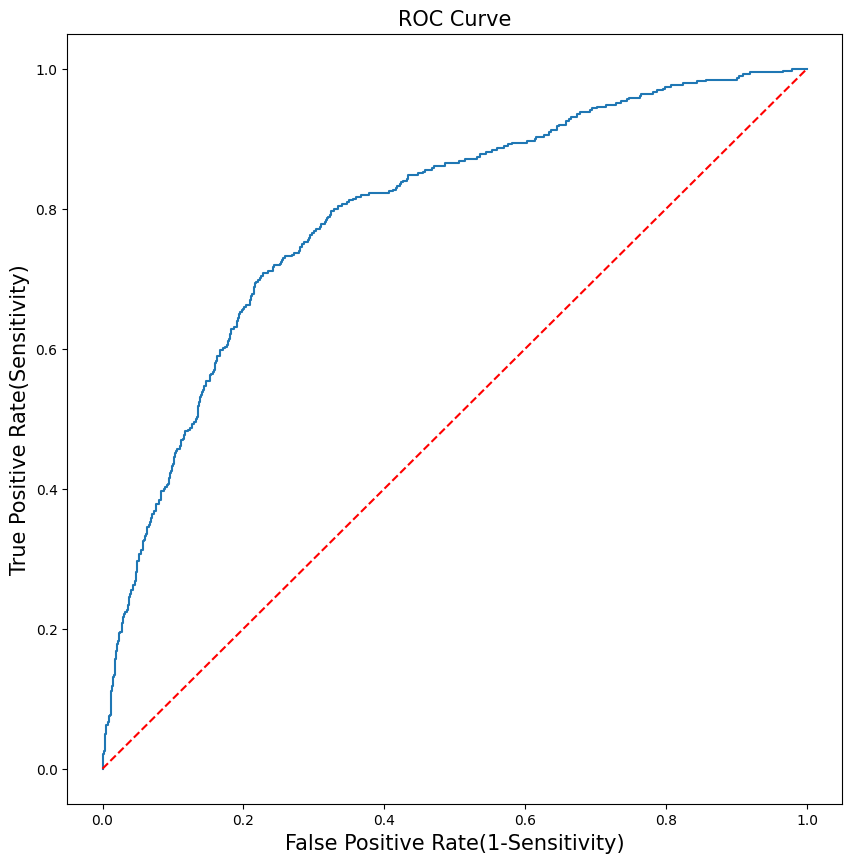

In [206]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = telecom_churn_fe["Churn_num"]
False_positive_rate, True_positive_rate, thresholds = roc_curve(actual, predictions)
plt.figure(figsize=(10,10))
plt.title('ROC Curve', fontsize = 15)
plt.plot(False_positive_rate, True_positive_rate)
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('True Positive Rate(Sensitivity)', fontsize = 15)
plt.xlabel('False Positive Rate(1-Sensitivity)', fontsize = 15)
plt.show()

### **AUC**

In [207]:
roc_auc = auc(False_positive_rate, True_positive_rate)
roc_auc

np.float64(0.7923526696414833)


**The AUC is close to 1, i.e., 0.8, the model is considered to be good.**

### **PRECISION, RECALL, and F1 SCORE**

In [208]:
from sklearn.metrics import classification_report
print(classification_report(telecom_churn_fe["Churn_num"],predicted_class1))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2278
           1       0.38      0.59      0.46       388

    accuracy                           0.80      2666
   macro avg       0.65      0.71      0.67      2666
weighted avg       0.84      0.80      0.82      2666



**Precision** = Out of all the Customers that the model predicted would Churn, 38% actually did.

**Recall** = Out of all the Customers that actually Churned, the model only predicted this outcome correctly for 59% of those Customers.

**F1 Score** = Since this value isn’t very close to 1, it tells us that the model does a poor job of predicting whether or not Customers will Churn.

# **CONCLUSION**

**1. Original Dataset**

*   Accuracy 0.7219917012448133
*   Sensitivity :  0.8562019758507134
*  Specificity :  0.5644329896907216

**2. New Dataset with new calculated Features like Total Calls, Total Minutes, and Total Charge**
*   Accuracy 0.7219917012448133
*   Sensitivity :  0.8353819139596137
*   Specificity :  0.5902061855670103

**ADDING NEW FEATURES LIKE TOTAL CALLS, TOTAL MINUTES, AND TOTAL CHARGE HASN'T IMPROVED THE MODEL ACCURACY COMPARED TO THE MODEL WITH ORGINAL DATA SET. HOWEVER WITH FEWER FEATURES WE ARE ABLE TO EXPLAIN THE MODEL**

# **RANDOM FORREST**

> Add blockquote



In [209]:
#Shape of the dataset
telecom_churn.shape

(2666, 26)

In [210]:
#Column names
telecom_churn.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Churn_num', 'Intl_plan_num', 'Vmail_plan_num',
       'Account_length_new', 'number_vmail_new', 'Total_eve_calls_new'],
      dtype='object')

In [211]:
#Column types
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

**There are 2666 records in the dataset. There are 26 variables in the data. The target varibale name is Churn_num; other variables are representing the data collected about each customer. There are numerical and string columns. We will work on numerical columns. Next step is to conduct basic data exploration on the predictor and target variables.**

In [212]:
#Summary of all numerical columns.
all_cols_summary = telecom_churn.describe()
print(all_cols_summary, 2)

       Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.21573

In [213]:
#Target Variable
print(telecom_churn['Churn_num'].value_counts())

Churn_num
0    2278
1     388
Name: count, dtype: int64


## **MODEL BUILDING AND VALIDATION**

Building a **Random Forest** model using only **numerical variables** (dropping categorical variables) can be a strategic choice in specific situations. Here’s when it makes sense:  

---

### **1. When You Have Many High-Cardinality Categorical Variables**
- If categorical variables have too many unique values (e.g., `City` with thousands of values), one-hot encoding can lead to a massive number of features, making the model inefficient.
- **Example**: Zip codes, customer IDs, or product SKUs that do not have meaningful relationships.

✅ **Solution**: Dropping such variables or using dimensionality reduction (e.g., feature hashing, target encoding).  

---

### **2. When Categorical Variables Are Not Important or Redundant**
- If categorical variables do not contribute much to predictive power (e.g., a dataset where numerical features dominate decision-making).
- If categorical features are highly correlated with numerical ones, dropping them avoids redundancy.

✅ **Solution**: Use **feature importance** (via `RandomForest.feature_importances_`) to check if categorical variables add value.  

---

### **3. When Encoding Categorical Variables Is Computationally Expensive**
- Encoding methods like one-hot encoding (OHE) or ordinal encoding can significantly increase memory usage and slow down training.
- Tree-based models handle numerical variables efficiently, so removing unnecessary categorical variables can speed up training.

✅ **Solution**: Drop high-cardinality categorical variables or use more compact encodings like **label encoding** for ordinal data.  

---

### **4. When Dealing with Small Datasets**
- In small datasets, categorical encoding can introduce noise and overfitting.
- **Example**: If you have only 100 rows and a categorical variable with 50 unique values, one-hot encoding could create too many sparse features.

✅ **Solution**: Stick to numerical variables to prevent overfitting.  

---

### **5. When the Categorical Variables Are Not Meaningful**
- If categorical variables contain arbitrary categories without a clear relationship with the target (e.g., randomly assigned user IDs, ticket numbers).

✅ **Solution**: Drop such variables unless feature engineering finds a meaningful transformation.  

---

### **Final Thoughts**
- If categorical variables have **low cardinality** and are **meaningful**, encoding them properly will **improve model performance**.  
- If they are **high-cardinality, redundant, or computationally expensive**, dropping them might be a **practical choice**.  

Would you like a guide on **how to encode categorical variables efficiently for Random Forest?** 🚀

**Creating a new dataset**

In [214]:
import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sp
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [216]:
#Droping certain variables
telecom_churn_rf = telecom_churn.drop(columns = ['Churn', 'State', 'International plan', 'Voice mail plan', 'Account length', 'Number vmail messages', 'Total eve calls'], axis = 1)

In [217]:
telecom_churn_rf.shape

(2666, 19)

In [218]:
telecom_churn_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area code               2666 non-null   int64  
 1   Total day minutes       2666 non-null   float64
 2   Total day calls         2666 non-null   int64  
 3   Total day charge        2666 non-null   float64
 4   Total eve minutes       2666 non-null   float64
 5   Total eve charge        2666 non-null   float64
 6   Total night minutes     2666 non-null   float64
 7   Total night calls       2666 non-null   int64  
 8   Total night charge      2666 non-null   float64
 9   Total intl minutes      2666 non-null   float64
 10  Total intl calls        2666 non-null   int64  
 11  Total intl charge       2666 non-null   float64
 12  Customer service calls  2666 non-null   int64  
 13  Churn_num               2666 non-null   int64  
 14  Intl_plan_num           2666 non-null   

In [219]:
telecom_churn_rf.columns

Index(['Area code', 'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn_num', 'Intl_plan_num', 'Vmail_plan_num', 'Account_length_new',
       'number_vmail_new', 'Total_eve_calls_new'],
      dtype='object')

In [220]:
telecom_churn_rf=telecom_churn_rf[['Churn_num','Area code', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Intl_plan_num', 'Vmail_plan_num', 'Account_length_new', 'number_vmail_new', 'Total_eve_calls_new']]

In [221]:
telecom_churn_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn_num               2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   Total day minutes       2666 non-null   float64
 3   Total day calls         2666 non-null   int64  
 4   Total day charge        2666 non-null   float64
 5   Total eve minutes       2666 non-null   float64
 6   Total eve charge        2666 non-null   float64
 7   Total night minutes     2666 non-null   float64
 8   Total night calls       2666 non-null   int64  
 9   Total night charge      2666 non-null   float64
 10  Total intl minutes      2666 non-null   float64
 11  Total intl calls        2666 non-null   int64  
 12  Total intl charge       2666 non-null   float64
 13  Customer service calls  2666 non-null   int64  
 14  Intl_plan_num           2666 non-null   

In [222]:
#Defining train and test data
features=list(telecom_churn_rf.columns[1:18])
X=telecom_churn_rf[features]
y=telecom_churn_rf['Churn_num']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 55)
print("X_train shape ", X_train.shape)
print("y_train shape ", y_train.shape)
print("X_test shape ", X_test.shape)
print("y_test shape ", y_test.shape)

X_train shape  (2132, 17)
y_train shape  (2132,)
X_test shape  (534, 17)
y_test shape  (534,)


In [224]:
#Building Decision Tree on training data
telecom_clf = tree.DecisionTreeClassifier(max_depth=6)
telecom_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6)

## **DECISION TREE RESULTS**

In [225]:
#Accuracy on train data
tree_predict8 = telecom_clf.predict(X_train)
cm8 = confusion_matrix(y_train, tree_predict8)
accuracy_train = (cm8[0,0]+cm8[1,1])/sum(sum(cm8))
print("Decision Tree Accuracy on Train data =  ", accuracy_train)

#Accuracy on test data
tree_predict9 = telecom_clf.predict(X_test)
cm9 = confusion_matrix(y_test, tree_predict9)
accuracy_test = (cm9[0,0]+cm9[1,1])/sum(sum(cm9))
print("Decision Tree Accuracy on Test data =  ", accuracy_test)

#AUC on Train data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, tree_predict8)
auc_train = auc(false_positive_rate, true_positive_rate)
print("Decision Tree AUC on Train data =  ", auc_train)

#AUC on Test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tree_predict9)
auc_test = auc(false_positive_rate, true_positive_rate)
print("Decision Tree AUC on Test data =  ", auc_test)


Decision Tree Accuracy on Train data =   0.9685741088180112
Decision Tree Accuracy on Test data =   0.9325842696629213
Decision Tree AUC on Train data =   0.8963566498256599
Decision Tree AUC on Test data =   0.8202247191011236


**The optimal depth for this data which max_depth = 6. The best decision tree gives us accuracy of 96% and AUC of 88% (closer to 1). Pelase note AUC is a better estimate. AUC is calcuated from the ROC Curve, which considers all threshold values. If the AUC value is approximately 1, the model is considered to be good. Also, the change of threshold the Accuracy can be changed.**

## **BUILDING RANDOM FOREST MODELS**

In [226]:
#BUILDING RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
telecom_forest = RandomForestClassifier(n_estimators= 350, max_features = 7, max_depth = 7)
telecom_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, max_features=7, n_estimators=350)

**We are building 350 trees here. A higher number is prefered. The number of features is chosen based on Logistic Regression we notices 5-7 variables were explain the target variable. We fixed the max_depth at 7.**

In [227]:
#Accuracy on train data
forest_predict10 = telecom_forest.predict(X_train)
cm10 = confusion_matrix(y_train, forest_predict10)
accuracy_train = (cm10[0,0]+cm10[1,1])/sum(sum(cm10))
print("Random Forest Accuracy on Train data =  ", accuracy_train)

#Accuracy on test data
forest_predict11 = telecom_forest.predict(X_test)
cm11 = confusion_matrix(y_test, forest_predict11)
accuracy_test = (cm11[0,0]+cm11[1,1])/sum(sum(cm11))
print("Random Forest Accuracy on Test data =  ", accuracy_test)

#AUC on Train data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, forest_predict10)
auc_train = auc(false_positive_rate, true_positive_rate)
print("Random Forest AUC on Train data =  ", auc_train)

#AUC on Test data
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_predict11)
auc_test = auc(false_positive_rate, true_positive_rate)
print("Random Forest AUC on Test data =  ", auc_test)

Random Forest Accuracy on Train data =   0.9737335834896811
Random Forest Accuracy on Test data =   0.9438202247191011
Random Forest AUC on Train data =   0.9063545150501673
Random Forest AUC on Test data =   0.849438202247191


**We can the Random Forest gives us 97% accuracy and AUC of 91% on the train data. And it give us accuracy of 94% and AUC of 84.94% on the test data. Comared to a singel decision Tree aobove the Random Forest gives 3% improvement on the test data.**

# **BOOSTING**

## **MODEL BUILDING AND VALIDATION**

In [228]:
import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sp
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import time
from sklearn.ensemble import GradientBoostingClassifier

In [229]:
telecom_churn_gbm = telecom_churn.drop(columns = ['Churn', 'State', 'International plan', 'Voice mail plan', 'Account length', 'Number vmail messages', 'Total eve calls'], axis = 1)

In [230]:
telecom_churn_gbm=telecom_churn_rf[['Churn_num','Area code', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Intl_plan_num', 'Vmail_plan_num', 'Account_length_new', 'number_vmail_new', 'Total_eve_calls_new']]

In [231]:
#Defining train and test data
telecom_gbm_features=list(telecom_churn_gbm.columns[1:18])
X=telecom_churn_gbm[telecom_gbm_features]
y=telecom_churn_gbm['Churn_num']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 55)
print("X_train shape ", X_train.shape)
print("y_train shape ", y_train.shape)
print("X_test shape ", X_test.shape)
print("y_test shape ", y_test.shape)

X_train shape  (2132, 17)
y_train shape  (2132,)
X_test shape  (534, 17)
y_test shape  (534,)


## **DECISION TREE RESULTS**

In [233]:
#Building Decision Tree on training data
from sklearn import tree
telecom_tree = tree.DecisionTreeClassifier(max_depth=6)
telecom_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [234]:
#Accuracy on train data
print("Decision Tree Results \n")
print("Accuracy on train data" , telecom_tree.score(X_train, y_train))
print("Accuracy on test data" , telecom_tree.score(X_test, y_test))

Decision Tree Results 

Accuracy on train data 0.9685741088180112
Accuracy on test data 0.9307116104868914


## **GRADIENT BOOSTING MODEL**

In [235]:
from sklearn.ensemble import GradientBoostingClassifier
telecom_gbm_model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01, verbose=1, max_depth=4)
##fitting the gradient boost classifier
telecom_gbm_model.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.8000            1.24s
         2           0.7897            1.21s
         3           0.7804            1.19s
         4           0.7710            1.17s
         5           0.7624            1.16s
         6           0.7538            1.14s
         7           0.7457            1.13s
         8           0.7382            1.11s
         9           0.7306            1.10s
        10           0.7236            1.09s
        20           0.6628            0.97s
        30           0.6163            0.85s
        40           0.5791            0.73s
        50           0.5483            0.62s
        60           0.5222            0.49s
        70           0.4984            0.37s
        80           0.4777            0.25s
        90           0.4600            0.12s
       100           0.4428            0.00s


GradientBoostingClassifier(learning_rate=0.01, max_depth=4, verbose=1)

In [237]:
#Validation on the train and test data
#Confusion Matrix
predictions12 = telecom_gbm_model.predict(X_train)
acutals12 = y_train
cm12 = confusion_matrix(acutals12, predictions12)
print("Confusion Matrix on Train data", cm12)
accuracy12 = (cm12[0,0] + cm12[1,1])/(sum(sum(cm12)))
print("GBM Tree Accuracy on Train data =  ", accuracy12)

predictions13 = telecom_gbm_model.predict(X_test)
acutals13 = y_test
cm13 = confusion_matrix(acutals13, predictions13)
print("Confusion Matrix on Test data", cm13)
accuracy13 = (cm13[0,0] + cm13[1,1])/(sum(sum(cm13)))
print("GBM Accuracy on Test data =  ", accuracy13)



Confusion Matrix on Train data [[1832    1]
 [ 152  147]]
GBM Tree Accuracy on Train data =   0.9282363977485929
Confusion Matrix on Test data [[443   2]
 [ 55  34]]
GBM Accuracy on Test data =   0.8932584269662921


In [238]:
#loop for different iterations
for i in range(5,500, 50):
    telecom_gbm_model = GradientBoostingClassifier(n_estimators= i, learning_rate=0.01, verbose=1, max_depth = 4)
    telecom_gbm_model.fit(X_train,y_train)
    print("N estimators = ", i)
    #Train data
    predictions = telecom_gbm_model.predict(X_train)
    actuals=y_train
    cm=confusion_matrix(actuals, predictions)
    accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
    print("Train accuracy", accuracy)
    #Test data
    predictions = telecom_gbm_model.predict(X_test)
    actuals=y_test
    cm=confusion_matrix(actuals, predictions)
    accuracy=(cm[0,0]+cm[1,1])/(sum(sum(cm)))
    print("Test accuracy", accuracy)


      Iter       Train Loss   Remaining Time 
         1           0.8000            0.05s
         2           0.7897            0.04s
         3           0.7804            0.02s
         4           0.7710            0.01s
         5           0.7624            0.00s
N estimators =  5
Train accuracy 0.8597560975609756
Test accuracy 0.8333333333333334
      Iter       Train Loss   Remaining Time 
         1           0.8000            0.64s
         2           0.7897            0.63s
         3           0.7804            0.63s
         4           0.7710            0.64s
         5           0.7624            0.62s
         6           0.7538            0.60s
         7           0.7457            0.59s
         8           0.7382            0.58s
         9           0.7306            0.57s
        10           0.7236            0.55s
        20           0.6628            0.44s
        30           0.6163            0.31s
        40           0.5791            0.19s
        50   

**From the test results, we can see that the accuracy of the test data gets saturated at the 94% to 95% from 255 range/iterations. We can finalize the learning rate as 0.01 and number of iterations as 255.**